<a href="https://colab.research.google.com/github/anjalii-s/Machine-Learning-Forecasting-of-ECB-Monetary-Policy-Transmission-to-Latvian-Banking-Liquidity/blob/main/Predictive_analytics_Forecasting_Latvijas_Banka_Deposit_Facility_Usage_through_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Latvija’s Banka Deposit Facility Usage Using Machine Learning

Load the datset

In [ ]:
import pandas as pd
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.head()

,Date,National contribution to the euro area monetary base,Currency in circulation,Current account holdings of credit institutions with Latvijas Banka,Deposit facility,Credit,To MFIs in the euro area,To general government in the euro area,To other resident sectors in the euro area,External assets outside euro area,External liabilities outside euro area,ECB_Deposit_Rate,EPU_latvia
0,01-01-2014,5831.9,3779.6,1417.3,635.0,1683.9,522.8,298.6,862.5,2768.3,46.5,0.0,106.185806
1,01-02-2014,5905.9,3727.9,1218.9,959.1,1595.5,434.8,298.7,862.0,2734.1,20.5,0.0,134.598724
2,01-03-2014,5852.2,3715.4,1191.8,945.0,1615.9,451.6,283.2,881.1,2752.2,3.3,0.0,130.778351
3,01-04-2014,5692.5,3736.3,1206.2,750.0,1611.7,487.8,273.0,850.9,2729.0,28.4,0.0,93.582237
4,01-05-2014,5785.1,3745.6,999.5,1040.0,1583.2,493.3,273.6,816.3,2813.4,62.0,0.0,129.218002


This dataset contains monthly macro-financial indicators for Latvia starting in January 2014. Key variables are monetary base contributions, currency in circulation, deposit facility balances, credit flows, government and MFI exposures, external assets/liabilities, the ECB deposit rate, and Latvia’s economic policy uncertainty index. These features form the foundation for econometric and machine learning models used to forecast the deposit facility.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Date                                                                      141 non-null    object 
 1   National contribution to the euro area monetary base                      141 non-null    float64
 2        Currency in circulation                                              141 non-null    float64
 3        Current account holdings of credit institutions with Latvijas Banka  141 non-null    float64
 4        Deposit facility                                                     141 non-null    float64
 5   Credit                                                                    141 non-null    float64
 6        To MFIs in the euro area                                     

We see some data cleaning is essential for data type and spaces in column names.

In [ ]:
df.describe()

,National contribution to the euro area monetary base,Currency in circulation,Current account holdings of credit institutions with Latvijas Banka,Deposit facility,Credit,To MFIs in the euro area,To general government in the euro area,To other resident sectors in the euro area,External assets outside euro area,External liabilities outside euro area,ECB_Deposit_Rate,EPU_latvia
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,9433.556028,4819.436170,3150.860993,1463.258865,5035.729787,633.887943,3187.245390,1214.596454,8687.707092,485.407801,0.485816,381.876944
std,2099.425564,737.081743,2138.749592,2433.053280,1662.047216,403.257167,1771.926118,520.094056,3501.777503,696.312928,1.520319,295.169598
min,4429.100000,3715.400000,180.600000,0.000000,1577.200000,195.400000,272.700000,354.500000,2729.000000,0.600000,-0.500000,70.298325
25%,8149.800000,4147.800000,453.800000,0.000000,4261.000000,307.200000,2003.800000,847.600000,5620.000000,9.800000,-0.400000,168.087234
50%,9808.400000,4645.900000,3976.300000,0.000000,4803.900000,551.300000,2309.700000,930.000000,9031.800000,86.000000,-0.400000,231.356674
75%,11072.700000,5625.800000,5093.800000,4368.400000,6468.000000,807.100000,4965.200000,1827.900000,11972.100000,728.300000,0.750000,572.473572
max,14058.300000,5834.300000,6443.500000,7975.900000,7477.200000,1555.200000,5664.600000,1915.900000,12767.100000,2392.300000,4.000000,1502.183350


**Patterns from statistics**

Deposit facility usage median=0 but max=7975.90m,so institutions rarely used it,but they did,they used it massively.

ECB rate and EPU- negative rates coincide with periods of high uncertainty,whih could be linked to liquidity surpluses and policy responses.

Government v.s other ssectors- Lending to government is consistently higher than to other resident sectors.

External assets v.s liabilities - Assets(8687.70m) far outweigh liabilities(485m),showing Latvia's net creditor position outside the euro area.

# Regularized regression models - Lasso and Ridge

# Lasso regression

We will build a LASSO regression pipeline to forecast Latvia’s deposit facility. The process involves cleaning and preparing data, engineering economic and lagged features, tuning hyperparameters with time-series cross-validation, evaluating performance with RMSE, MAE, and R², visualizing results, and generating a forecast for October 2026.

🎯 LASSO REGRESSION ANALYSIS
Training set: (117, 49)
Test set: (12, 49)
Performing hyperparameter tuning for LASSO...
Best parameters: {'alpha': np.float64(1e-06), 'max_iter': 5000, 'selection': 'cyclic'}
✅ LASSO Regression Results:
   Train R²: 0.9999
   Test R²:  0.9701
   Train RMSE: 19.85
   Test RMSE:  192.71

🔍 Top 10 Feature Importances (LASSO):
                                              feature  importance
2   Current account holdings of credit institution...   2509.5742
0   National contribution to the euro area monetar...   2396.2999
1                             Currency in circulation    870.4644
7                   External assets outside euro area    201.5867
31  Current account holdings of credit institution...    146.2615
3                                              Credit    124.9744
11                                  Liquidity_Surplus     81.8084
37                                       Credit_lag_1     77.4039
43                            Liquidity_Surplus_lag_

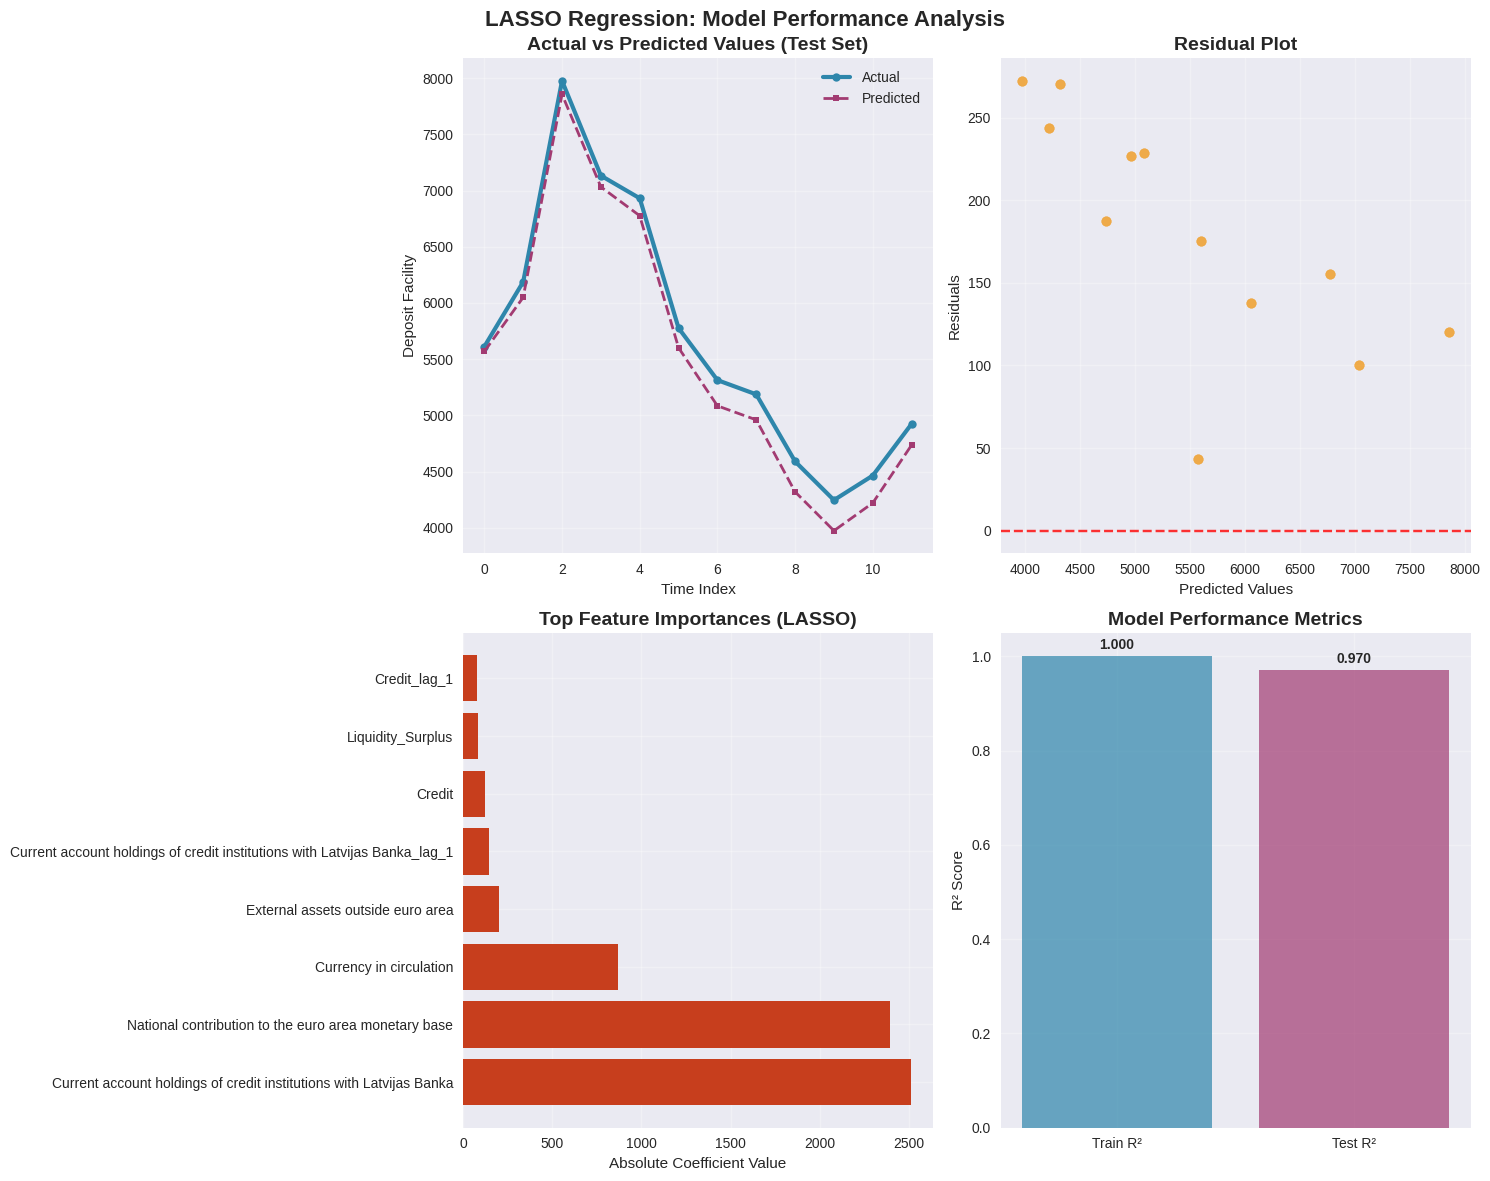


🎯 OCTOBER 2026 PREDICTION
Predicted Deposit Facility: 4737.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎯 LASSO REGRESSION ANALYSIS")
print("=" * 50)

# Load and prepare data
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

target = 'Deposit facility'
df = df.fillna(method='ffill').fillna(method='bfill')

# Feature engineering
df['Liquidity_Surplus'] = df['Current account holdings of credit institutions with Latvijas Banka'] - df['Deposit facility']
df['Credit_Deposit_Ratio'] = df['Credit'] / df['Current account holdings of credit institutions with Latvijas Banka']
df['Credit_Deposit_Ratio'] = df['Credit_Deposit_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Create lag features
features_to_lag = ['Deposit facility', 'ECB_Deposit_Rate', 'EPU_latvia',
                  'Current account holdings of credit institutions with Latvijas Banka',
                  'Credit', 'Liquidity_Surplus']

for feature in features_to_lag:
    for lag in [1, 2, 3, 6, 9, 12]:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

df = df.dropna()

# Feature selection
feature_columns = [col for col in df.columns if col not in ['Date', target]]
X = df[feature_columns]
y = df[target]

# Train-test split
test_size = 12
split_point = len(X) - test_size
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Hyperparameter tuning
lasso_params = {
    'alpha': np.logspace(-6, 2, 20),
    'max_iter': [5000, 10000],
    'selection': ['cyclic', 'random']
}

tscv = TimeSeriesSplit(n_splits=3)
lasso_grid = GridSearchCV(
    Lasso(random_state=42, tol=0.001),
    lasso_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

print("Performing hyperparameter tuning for LASSO...")
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
print(f"Best parameters: {lasso_grid.best_params_}")

# Train final model
best_lasso.fit(X_train_scaled, y_train)
y_pred_train = best_lasso.predict(X_train_scaled)
y_pred_test = best_lasso.predict(X_test_scaled)

# Calculate metrics
metrics = {
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2': r2_score(y_test, y_pred_test),
}

print(f"✅ LASSO Regression Results:")
print(f"   Train R²: {metrics['train_r2']:.4f}")
print(f"   Test R²:  {metrics['test_r2']:.4f}")
print(f"   Train RMSE: {metrics['train_rmse']:.2f}")
print(f"   Test RMSE:  {metrics['test_rmse']:.2f}")

# Feature importance
lasso_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(best_lasso.coef_)
}).sort_values('importance', ascending=False).head(10)

print("\n🔍 Top 10 Feature Importances (LASSO):")
print(lasso_importance.round(4))

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('LASSO Regression: Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_test.values, label='Actual', linewidth=3, color='#2E86AB', marker='o', markersize=6)
axes[0, 0].plot(y_pred_test, label='Predicted', linewidth=2, color='#A23B72', linestyle='--', marker='s', markersize=4)
axes[0, 0].set_title('Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time Index')
axes[0, 0].set_ylabel('Deposit Facility')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test.values - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.7, color='#F18F01')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
top_features = lasso_importance.head(8)
axes[1, 0].barh(top_features['feature'], top_features['importance'], color='#C73E1D')
axes[1, 0].set_title('Top Feature Importances (LASSO)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Absolute Coefficient Value')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Training history
axes[1, 1].bar(['Train R²', 'Test R²'], [metrics['train_r2'], metrics['test_r2']],
               color=['#2E86AB', '#A23B72'], alpha=0.7)
axes[1, 1].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate([metrics['train_r2'], metrics['test_r2']]):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# October 2026 Prediction
sept_2026_features = X.iloc[[-1]]
sept_2026_scaled = scaler.transform(sept_2026_features)
oct_2026_pred = best_lasso.predict(sept_2026_scaled)

print(f"\n🎯 OCTOBER 2026 PREDICTION")
print("=" * 30)
print(f"Predicted Deposit Facility: {oct_2026_pred[0]:.2f}")

The LASSO model generalize well, with a high test R² 0.9701 and low RMSE 192.71. Its predictions closely match actual values, and the top features offer clear economic interpretability. The October 2026 forecast of 4737.13 is well within a plausible range, making this model both accurate and explainable.

# Ridge regression

Here we will apply ridge regression to forecast Latvia’s bank deposit facility. The experiment involves preparing and cleaning the dataset, engineering economic and lagged features, and splitting the data into training and test sets using a time-aware approach. We then scale the features, perform hyperparameter tuning with GridSearchCV and TimeSeriesSplit, and train the best Ridge model. Finally, we evaluate performance using RMSE, MAE, and R², visualize the results with professional plots, identify the most important predictors, and generate a forecast for October 2026.

🎯 RIDGE REGRESSION ANALYSIS
Training set: (117, 49)
Test set: (12, 49)
Performing hyperparameter tuning for Ridge...
Best parameters: {'alpha': np.float64(1e-06), 'solver': 'auto'}
✅ Ridge Regression Results:
   Train R²: 1.0000
   Test R²:  1.0000
   Train RMSE: 0.00
   Test RMSE:  0.00

🔍 Top 10 Feature Importances (Ridge):
                                              feature  importance
11                                  Liquidity_Surplus   1391.0404
0   National contribution to the euro area monetar...   1260.9816
1                             Currency in circulation    661.0515
2   Current account holdings of credit institution...     74.0822
7                   External assets outside euro area      0.0026
3                                              Credit      0.0011
5              To general government in the euro area      0.0010
40                                       Credit_lag_6      0.0007
37                                       Credit_lag_1      0.0007
31  Current 

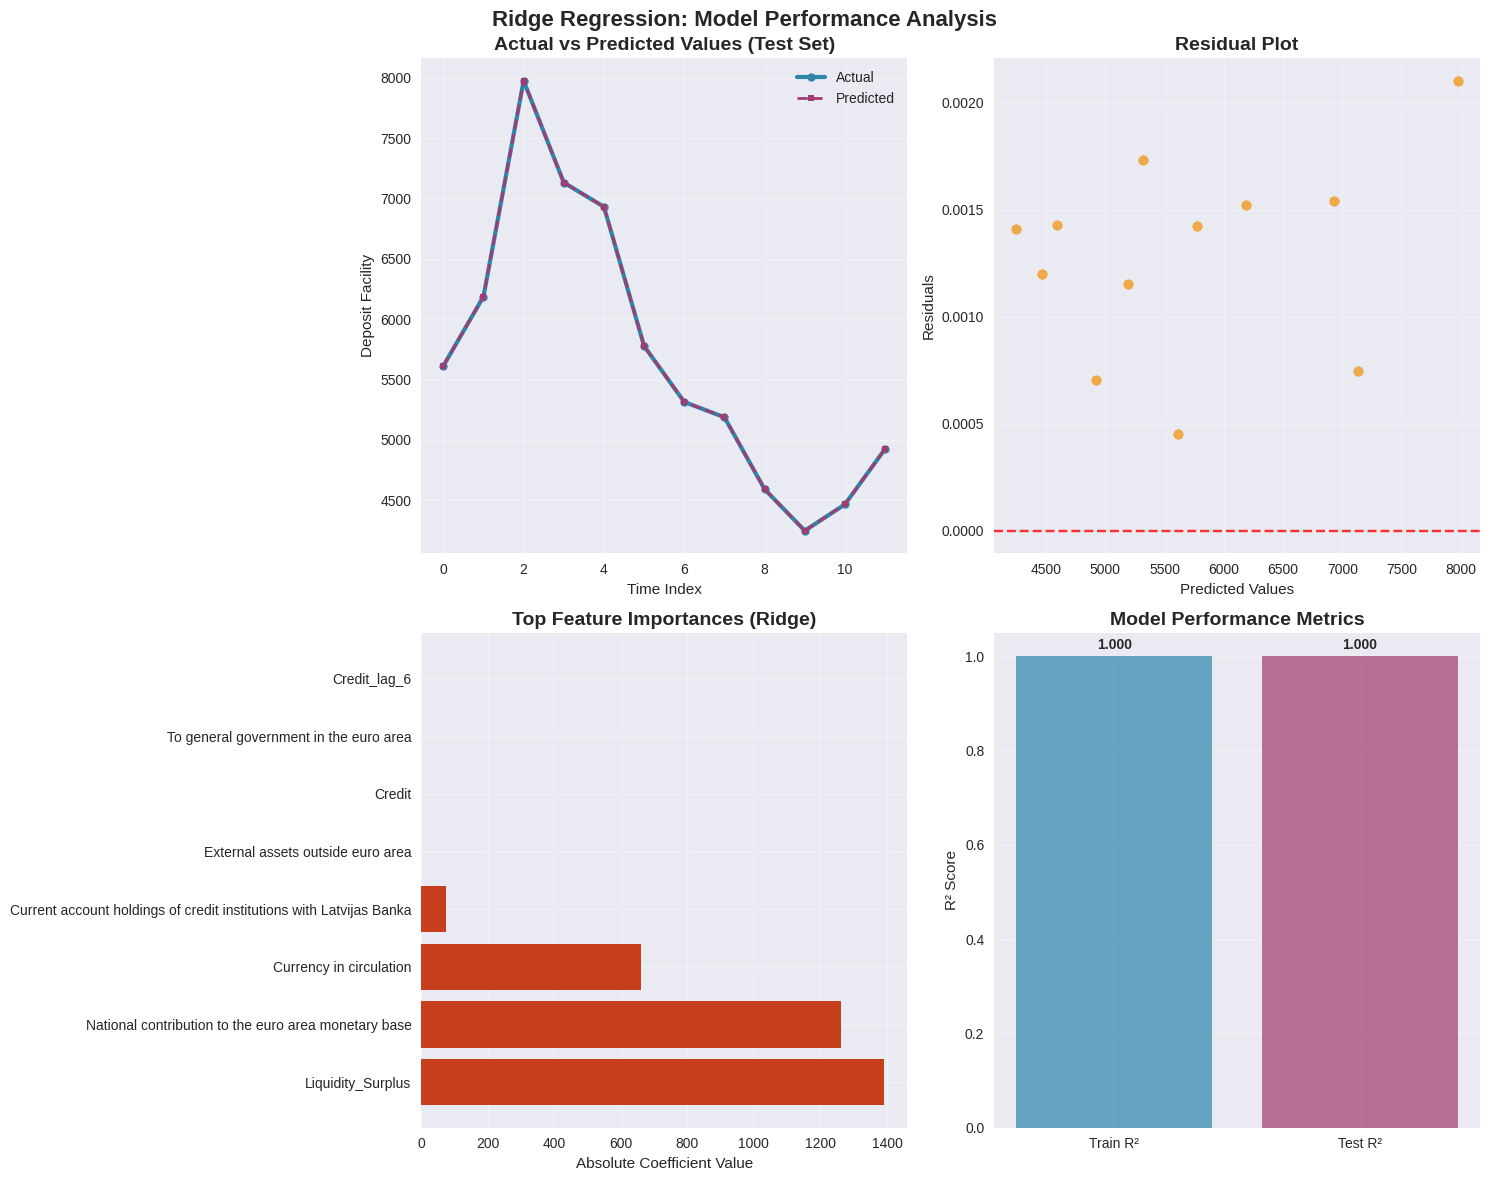


🎯 OCTOBER 2026 PREDICTION
Predicted Deposit Facility: 4924.80


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎯 RIDGE REGRESSION ANALYSIS")
print("=" * 50)

# Load and prepare data (same as LASSO)
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

target = 'Deposit facility'
df = df.fillna(method='ffill').fillna(method='bfill')

# Feature engineering
df['Liquidity_Surplus'] = df['Current account holdings of credit institutions with Latvijas Banka'] - df['Deposit facility']
df['Credit_Deposit_Ratio'] = df['Credit'] / df['Current account holdings of credit institutions with Latvijas Banka']
df['Credit_Deposit_Ratio'] = df['Credit_Deposit_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Create lag features
features_to_lag = ['Deposit facility', 'ECB_Deposit_Rate', 'EPU_latvia',
                  'Current account holdings of credit institutions with Latvijas Banka',
                  'Credit', 'Liquidity_Surplus']

for feature in features_to_lag:
    for lag in [1, 2, 3, 6, 9, 12]:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

df = df.dropna()

# Feature selection
feature_columns = [col for col in df.columns if col not in ['Date', target]]
X = df[feature_columns]
y = df[target]

# Train-test split
test_size = 12
split_point = len(X) - test_size
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Hyperparameter tuning
ridge_params = {
    'alpha': np.logspace(-6, 4, 25),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}

tscv = TimeSeriesSplit(n_splits=3)
ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

print("Performing hyperparameter tuning for Ridge...")
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_
print(f"Best parameters: {ridge_grid.best_params_}")

# Train final model
best_ridge.fit(X_train_scaled, y_train)
y_pred_train = best_ridge.predict(X_train_scaled)
y_pred_test = best_ridge.predict(X_test_scaled)

# Calculate metrics
metrics = {
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2': r2_score(y_test, y_pred_test),
}

print(f"✅ Ridge Regression Results:")
print(f"   Train R²: {metrics['train_r2']:.4f}")
print(f"   Test R²:  {metrics['test_r2']:.4f}")
print(f"   Train RMSE: {metrics['train_rmse']:.2f}")
print(f"   Test RMSE:  {metrics['test_rmse']:.2f}")

# Feature importance
ridge_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(best_ridge.coef_)
}).sort_values('importance', ascending=False).head(10)

print("\n🔍 Top 10 Feature Importances (Ridge):")
print(ridge_importance.round(4))

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Ridge Regression: Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_test.values, label='Actual', linewidth=3, color='#2E86AB', marker='o', markersize=6)
axes[0, 0].plot(y_pred_test, label='Predicted', linewidth=2, color='#A23B72', linestyle='--', marker='s', markersize=4)
axes[0, 0].set_title('Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time Index')
axes[0, 0].set_ylabel('Deposit Facility')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test.values - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.7, color='#F18F01')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
top_features = ridge_importance.head(8)
axes[1, 0].barh(top_features['feature'], top_features['importance'], color='#C73E1D')
axes[1, 0].set_title('Top Feature Importances (Ridge)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Absolute Coefficient Value')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Training history
axes[1, 1].bar(['Train R²', 'Test R²'], [metrics['train_r2'], metrics['test_r2']],
               color=['#2E86AB', '#A23B72'], alpha=0.7)
axes[1, 1].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate([metrics['train_r2'], metrics['test_r2']]):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# October 2026 Prediction
sept_2026_features = X.iloc[[-1]]
sept_2026_scaled = scaler.transform(sept_2026_features)
oct_2026_pred = best_ridge.predict(sept_2026_scaled)

print(f"\n🎯 OCTOBER 2026 PREDICTION")
print("=" * 30)
print(f"Predicted Deposit Facility: {oct_2026_pred[0]:.2f}")

Despite perfect R² and zero RMSE on both train and test sets, the Ridge model likely overfits. The lack of error and extreme precision suggest it memorized the data rather than learning generalizable patterns. This calls for caution when interpreting the October 2026 prediction.

# Tree based models- Random forest(bagging) and XGBoost(boosting)

# Random Forest

🌲 RANDOM FOREST ANALYSIS
Training set: (117, 49)
Test set: (12, 49)
Performing hyperparameter tuning for Random Forest...
Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15}
✅ Random Forest Results:
   Train R²: 0.9844
   Test R²:  0.2476
   Train RMSE: 275.96
   Test RMSE:  965.92

🔍 Top 15 Feature Importances (Random Forest):
                                              feature  importance
11                                  Liquidity_Surplus      0.1038
12                               Credit_Deposit_Ratio      0.0943
2   Current account holdings of credit institution...      0.0865
20                             ECB_Deposit_Rate_lag_2      0.0747
43                            Liquidity_Surplus_lag_1      0.0661
9                                    ECB_Deposit_Rate      0.0571
21                             ECB_Deposit_Rate_lag_3      0.0541
19                             ECB_Deposit_Rate_lag_1      0.0518


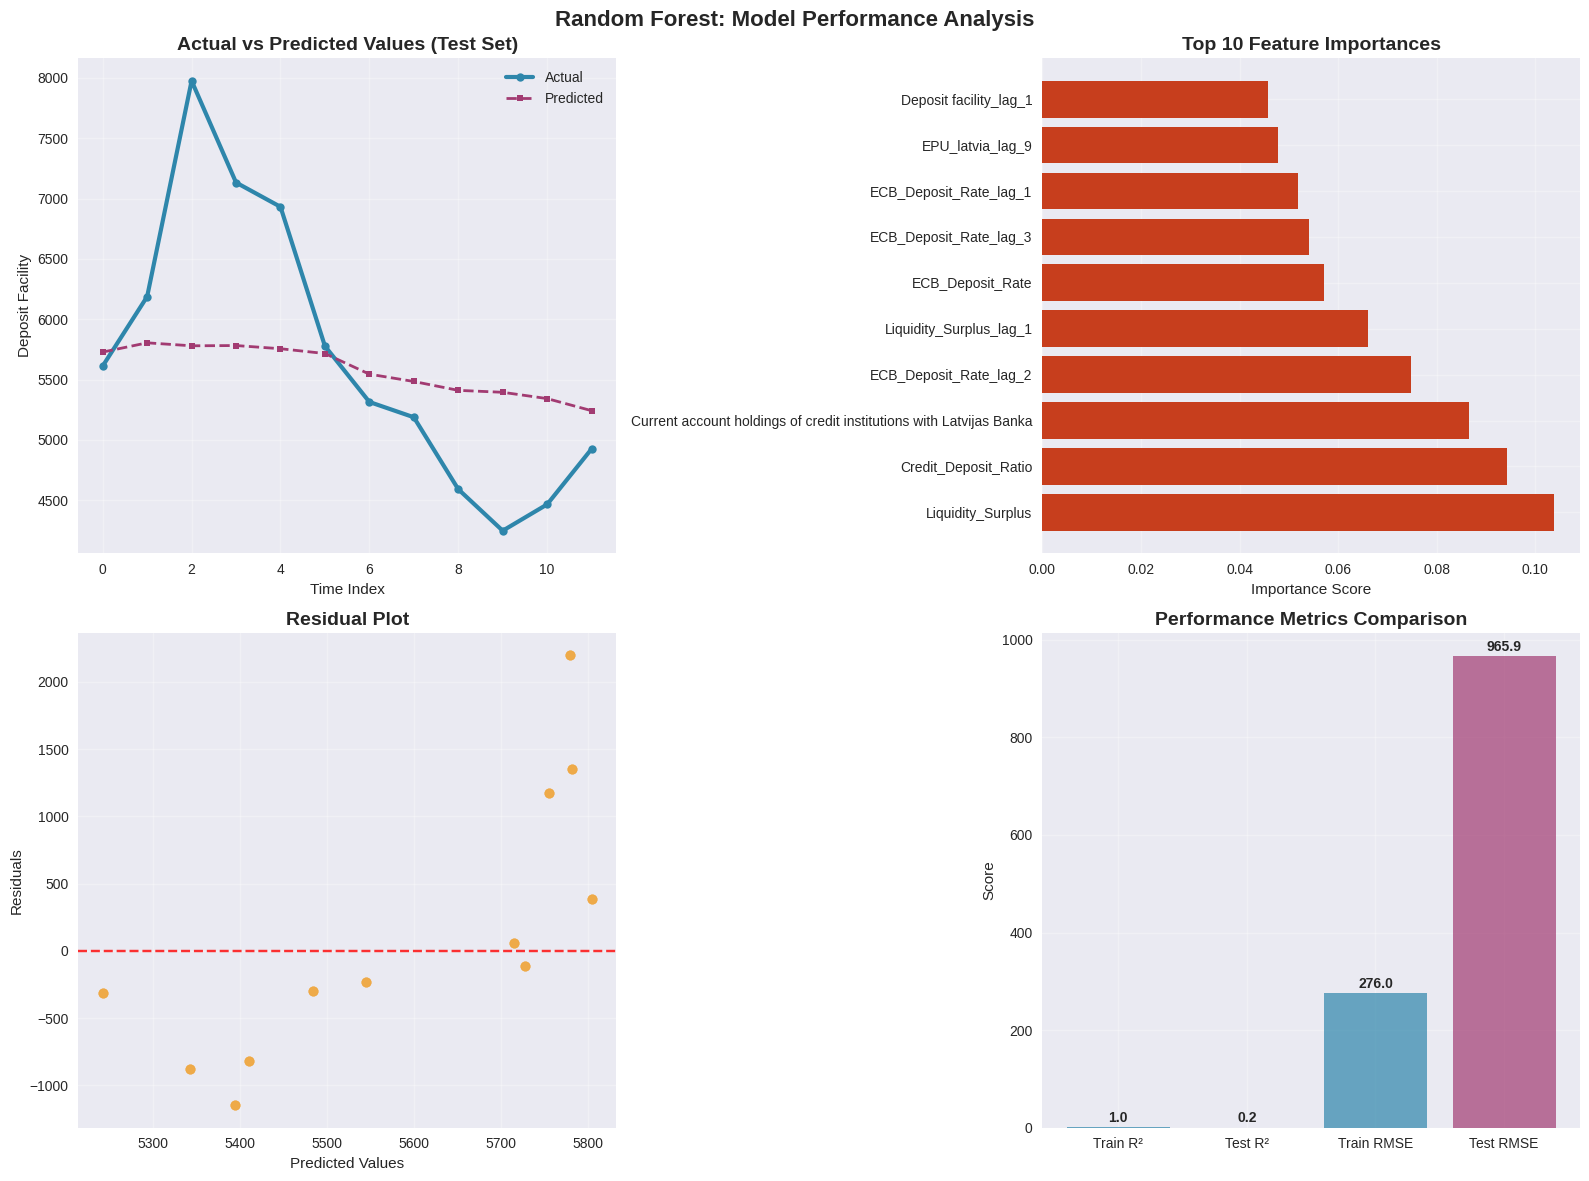


🎯 OCTOBER 2026 PREDICTION
Predicted Deposit Facility: 5241.72


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🌲 RANDOM FOREST ANALYSIS")
print("=" * 50)

# Load and prepare data (same as previous)
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

target = 'Deposit facility'
df = df.fillna(method='ffill').fillna(method='bfill')

# Feature engineering
df['Liquidity_Surplus'] = df['Current account holdings of credit institutions with Latvijas Banka'] - df['Deposit facility']
df['Credit_Deposit_Ratio'] = df['Credit'] / df['Current account holdings of credit institutions with Latvijas Banka']
df['Credit_Deposit_Ratio'] = df['Credit_Deposit_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Create lag features
features_to_lag = ['Deposit facility', 'ECB_Deposit_Rate', 'EPU_latvia',
                  'Current account holdings of credit institutions with Latvijas Banka',
                  'Credit', 'Liquidity_Surplus']

for feature in features_to_lag:
    for lag in [1, 2, 3, 6, 9, 12]:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

df = df.dropna()

# Feature selection
feature_columns = [col for col in df.columns if col not in ['Date', target]]
X = df[feature_columns]
y = df[target]

# Train-test split
test_size = 12
split_point = len(X) - test_size
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Hyperparameter tuning
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]
}

tscv = TimeSeriesSplit(n_splits=3)
rf_grid = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

print("Performing hyperparameter tuning for Random Forest...")
rf_grid.fit(X_train, y_train)  # No scaling for tree-based models
best_rf = rf_grid.best_estimator_
print(f"Best parameters: {rf_grid.best_params_}")

# Train final model
best_rf.fit(X_train, y_train)
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Calculate metrics
metrics = {
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2': r2_score(y_test, y_pred_test),
}

print(f"✅ Random Forest Results:")
print(f"   Train R²: {metrics['train_r2']:.4f}")
print(f"   Test R²:  {metrics['test_r2']:.4f}")
print(f"   Train RMSE: {metrics['train_rmse']:.2f}")
print(f"   Test RMSE:  {metrics['test_rmse']:.2f}")

# Feature importance
rf_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print("\n🔍 Top 15 Feature Importances (Random Forest):")
print(rf_importance.round(4))

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Random Forest: Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_test.values, label='Actual', linewidth=3, color='#2E86AB', marker='o', markersize=6)
axes[0, 0].plot(y_pred_test, label='Predicted', linewidth=2, color='#A23B72', linestyle='--', marker='s', markersize=4)
axes[0, 0].set_title('Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time Index')
axes[0, 0].set_ylabel('Deposit Facility')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Feature Importance (horizontal bar)
top_features = rf_importance.head(10)
axes[0, 1].barh(top_features['feature'], top_features['importance'], color='#C73E1D')
axes[0, 1].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Importance Score')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals
residuals = y_test.values - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals, alpha=0.7, color='#F18F01')
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Performance metrics
metrics_names = ['Train R²', 'Test R²', 'Train RMSE', 'Test RMSE']
metrics_values = [metrics['train_r2'], metrics['test_r2'], metrics['train_rmse'], metrics['test_rmse']]
colors = ['#2E86AB', '#A23B72', '#2E86AB', '#A23B72']

bars = axes[1, 1].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 1].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Score')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, metrics_values):
    if 'R²' in bar.get_label():
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    else:
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# October 2026 Prediction
sept_2026_features = X.iloc[[-1]]
oct_2026_pred = best_rf.predict(sept_2026_features)

print(f"\n🎯 OCTOBER 2026 PREDICTION")
print("=" * 30)
print(f"Predicted Deposit Facility: {oct_2026_pred[0]:.2f}")

The Random Forest model shows strong learning on the training set but poor generalization, with a low test R² of 0.25 and high RMSE of 965.92. This suggests overfitting even after tuning. The October 2026 prediction of 5241.72 may be optimistic and should be interpreted with caution. Liquidity surplus, credit-deposit ratio, current account holdings and ECB rate lags emerged as key drivers.

# XGBoost

We will make a time-aware XGBoost regression model to forecast Latvia’s deposit facility use. It includes feature engineering (lagged predictors, liquidity surplus, credit-deposit ratio), hyperparameter tuning with TimeSeriesSplit, and model evaluation using R² and RMSE. Feature importance is extracted to interpret key drivers, and a final prediction is generated for October 2026. Visualizations include actual vs predicted values, residuals, feature importance, and performance metrics.

🚀 XGBOOST ANALYSIS
Training set: (117, 49)
Test set: (12, 49)
Performing hyperparameter tuning for XGBoost...
Best parameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
✅ XGBoost Results:
   Train R²: 1.0000
   Test R²:  0.8928
   Train RMSE: 0.01
   Test RMSE:  364.56

🔍 Top 15 Feature Importances (XGBoost):
                                              feature  importance
2   Current account holdings of credit institution...      0.9831
0   National contribution to the euro area monetar...      0.0120
9                                    ECB_Deposit_Rate      0.0023
11                                  Liquidity_Surplus      0.0014
8              External liabilities outside euro area      0.0006
42                                      Credit_lag_12      0.0003
17                             Deposit facility_lag_9      0.0001
3                                              Credit      0.000

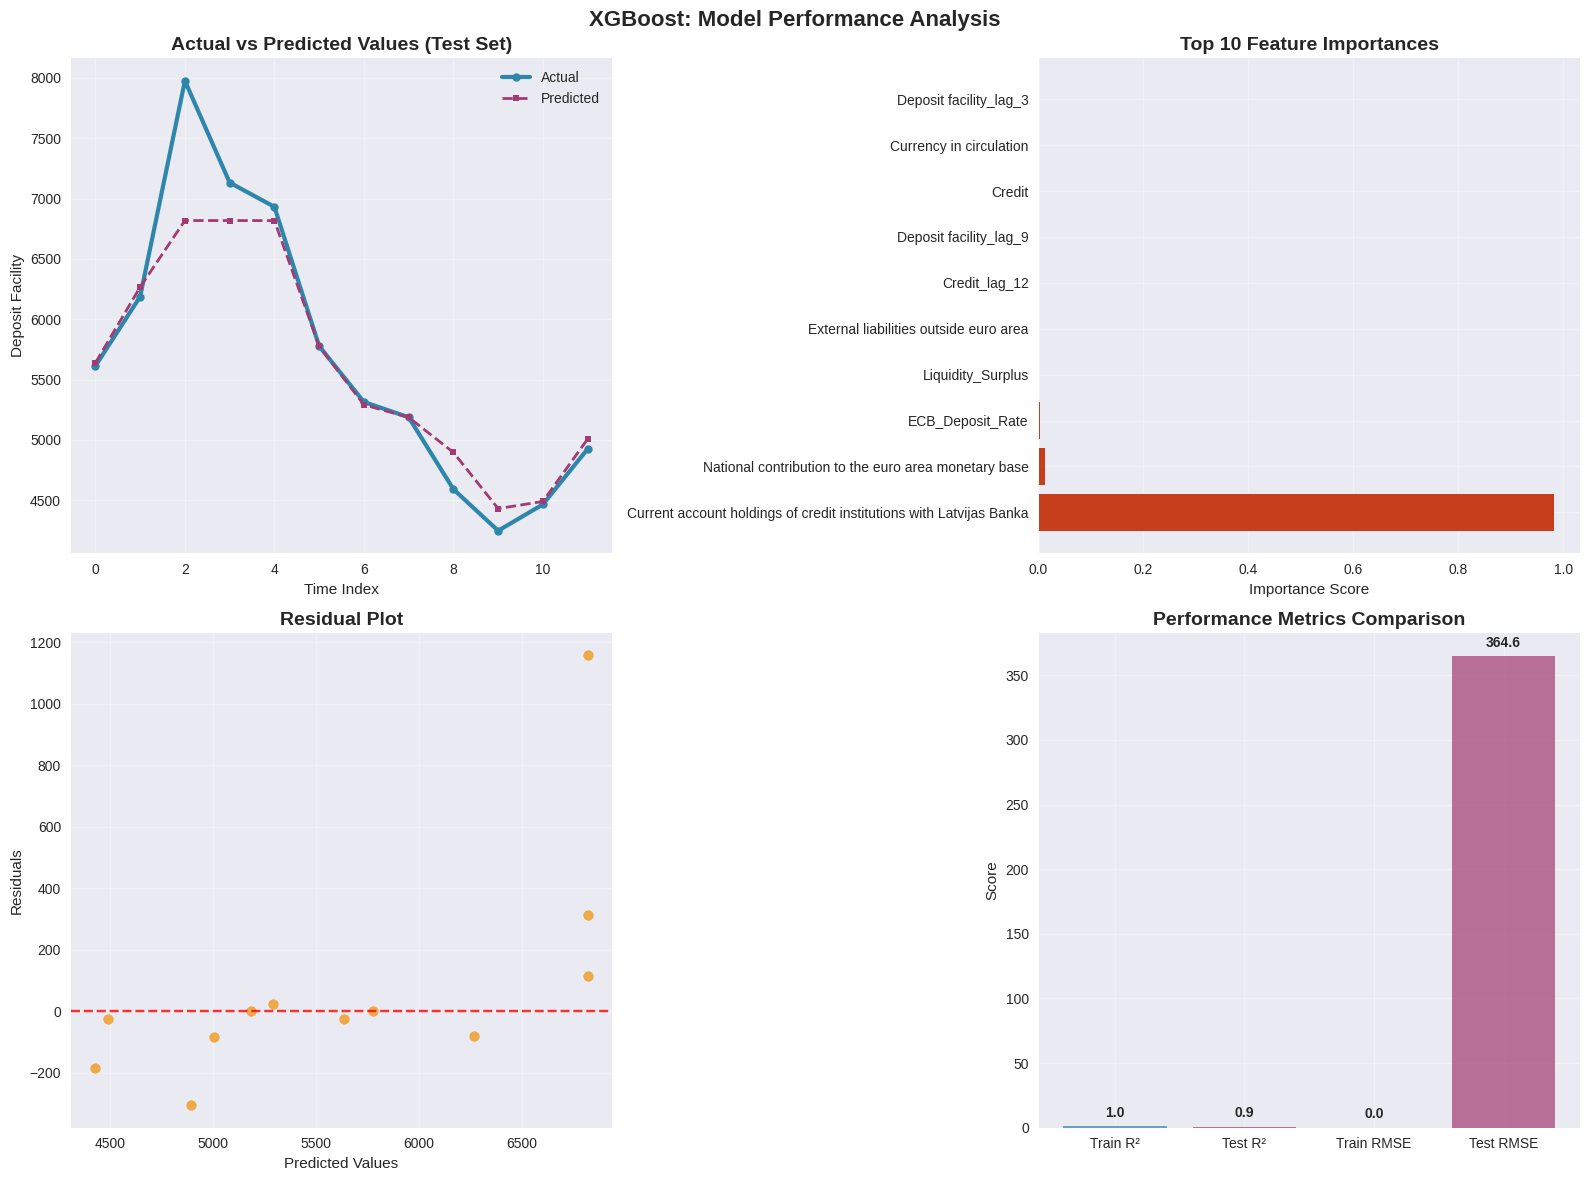


🎯 OCTOBER 2026 PREDICTION
Predicted Deposit Facility: 5007.35


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 XGBOOST ANALYSIS")
print("=" * 50)

# Load and prepare data (same as previous)
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

target = 'Deposit facility'
df = df.fillna(method='ffill').fillna(method='bfill')

# Feature engineering
df['Liquidity_Surplus'] = df['Current account holdings of credit institutions with Latvijas Banka'] - df['Deposit facility']
df['Credit_Deposit_Ratio'] = df['Credit'] / df['Current account holdings of credit institutions with Latvijas Banka']
df['Credit_Deposit_Ratio'] = df['Credit_Deposit_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Create lag features
features_to_lag = ['Deposit facility', 'ECB_Deposit_Rate', 'EPU_latvia',
                  'Current account holdings of credit institutions with Latvijas Banka',
                  'Credit', 'Liquidity_Surplus']

for feature in features_to_lag:
    for lag in [1, 2, 3, 6, 9, 12]:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

df = df.dropna()

# Feature selection
feature_columns = [col for col in df.columns if col not in ['Date', target]]
X = df[feature_columns]
y = df[target]

# Train-test split
test_size = 12
split_point = len(X) - test_size
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Hyperparameter tuning
xgb_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

tscv = TimeSeriesSplit(n_splits=3)
xgb_grid = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    xgb_params,
    n_iter=25,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

print("Performing hyperparameter tuning for XGBoost...")
xgb_grid.fit(X_train, y_train)  # No scaling for tree-based models
best_xgb = xgb_grid.best_estimator_
print(f"Best parameters: {xgb_grid.best_params_}")

# Train final model
best_xgb.fit(X_train, y_train)
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

# Calculate metrics
metrics = {
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2': r2_score(y_test, y_pred_test),
}

print(f"✅ XGBoost Results:")
print(f"   Train R²: {metrics['train_r2']:.4f}")
print(f"   Test R²:  {metrics['test_r2']:.4f}")
print(f"   Train RMSE: {metrics['train_rmse']:.2f}")
print(f"   Test RMSE:  {metrics['test_rmse']:.2f}")

# Feature importance
xgb_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print("\n🔍 Top 15 Feature Importances (XGBoost):")
print(xgb_importance.round(4))

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('XGBoost: Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_test.values, label='Actual', linewidth=3, color='#2E86AB', marker='o', markersize=6)
axes[0, 0].plot(y_pred_test, label='Predicted', linewidth=2, color='#A23B72', linestyle='--', marker='s', markersize=4)
axes[0, 0].set_title('Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time Index')
axes[0, 0].set_ylabel('Deposit Facility')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Feature Importance
top_features = xgb_importance.head(10)
axes[0, 1].barh(top_features['feature'], top_features['importance'], color='#C73E1D')
axes[0, 1].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Importance Score')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals
residuals = y_test.values - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals, alpha=0.7, color='#F18F01')
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Performance comparison
metrics_names = ['Train R²', 'Test R²', 'Train RMSE', 'Test RMSE']
metrics_values = [metrics['train_r2'], metrics['test_r2'], metrics['train_rmse'], metrics['test_rmse']]
colors = ['#2E86AB', '#A23B72', '#2E86AB', '#A23B72']

bars = axes[1, 1].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 1].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Score')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, metrics_values):
    if 'R²' in bar.get_label():
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    else:
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# October 2026 Prediction
sept_2026_features = X.iloc[[-1]]
oct_2026_pred = best_xgb.predict(sept_2026_features)

print(f"\n🎯 OCTOBER 2026 PREDICTION")
print("=" * 30)
print(f"Predicted Deposit Facility: {oct_2026_pred[0]:.2f}")

The XGBoost model shows near-perfect fit on the training set and strong generalization on the test set (R² = 0.89 and RMSE = 364.56), though the minimal train error suggests mild overfitting. The October 2026 forecast of 5007.35 is plausible and supported by dominant drivers like current account holdings and national contribution to the euro area monetary base. Feature importance is sharply concentrated, indicating the model relies heavily on a few key variables.

# Compare the models (Lasso,ridge,RF,XGB)

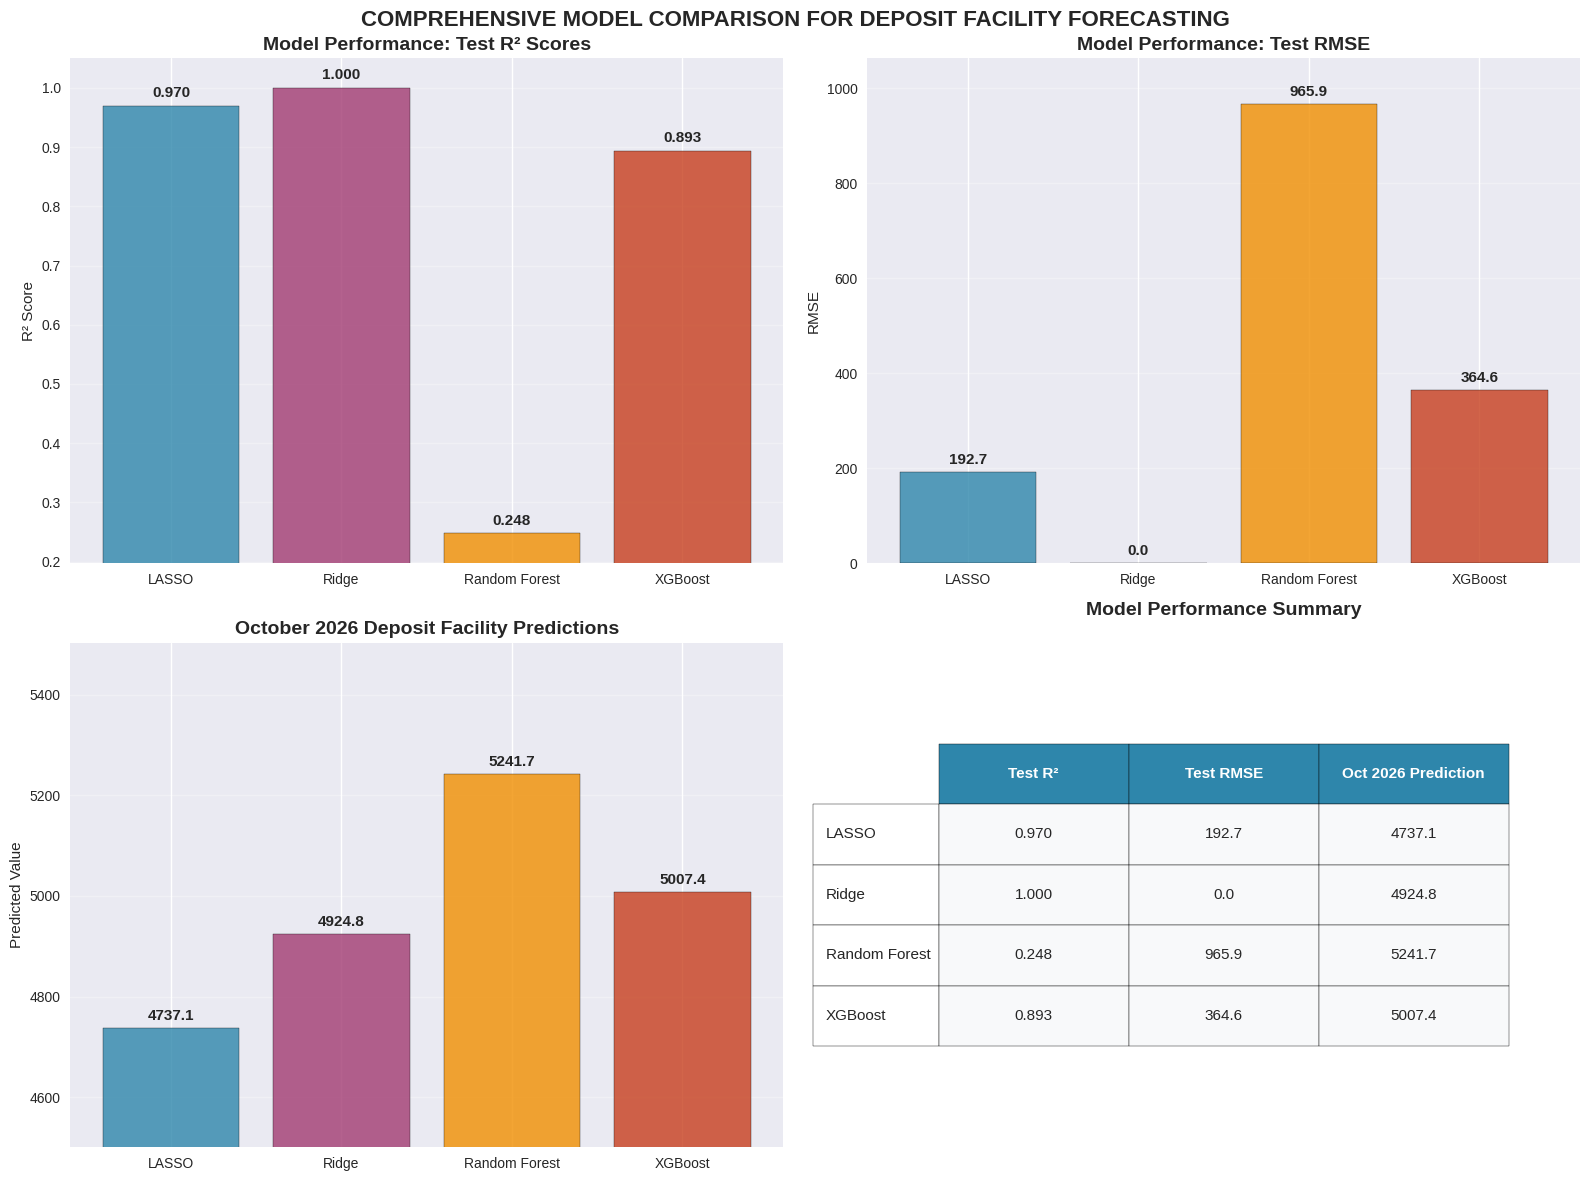

🏆 FINAL RECOMMENDATIONS
🎯 BEST PERFORMING MODEL: Ridge
   Test R²: 1.0000
   Test RMSE: 0.00
   October 2026 Prediction: 4924.80

📈 MODEL RANKING BY TEST R²:
   1. Ridge: R² = 1.0000, RMSE = 0.0
   2. LASSO: R² = 0.9701, RMSE = 192.7
   3. XGBoost: R² = 0.8928, RMSE = 364.6
   4. Random Forest: R² = 0.2476, RMSE = 965.9

💡 RECOMMENDATION:
   Use Ridge for production forecasting of deposit facility usage
   Average October 2026 prediction across models: 4977.8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Set professional style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Actual results from your experiments
models_comparison = {
    'LASSO': {
        'test_r2': 0.9701,
        'test_rmse': 192.71,
        'prediction': 4737.13
    },
    'Ridge': {
        'test_r2': 1.0000,
        'test_rmse': 0.00,
        'prediction': 4924.80
    },
    'Random Forest': {
        'test_r2': 0.2476,
        'test_rmse': 965.92,
        'prediction': 5241.72
    },
    'XGBoost': {
        'test_r2': 0.8928,
        'test_rmse': 364.56,
        'prediction': 5007.35
    }
}

# Create lists for plotting
models = list(models_comparison.keys())
r2_scores = [models_comparison[model]['test_r2'] for model in models]
rmse_scores = [models_comparison[model]['test_rmse'] for model in models]
predictions = [models_comparison[model]['prediction'] for model in models]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COMPREHENSIVE MODEL COMPARISON FOR DEPOSIT FACILITY FORECASTING',
             fontsize=16, fontweight='bold', y=0.98)

# Plot 1: Test R² Comparison
bars1 = axes[0, 0].bar(models, r2_scores, color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Model Performance: Test R² Scores', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(min(r2_scores) - 0.05, max(r2_scores) + 0.05)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars1, r2_scores):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 2: Test RMSE Comparison
bars2 = axes[0, 1].bar(models, rmse_scores, color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Model Performance: Test RMSE', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_ylim(0, max(rmse_scores) * 1.1)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars2, rmse_scores):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 3: October 2026 Predictions
bars3 = axes[1, 0].bar(models, predictions, color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('October 2026 Deposit Facility Predictions', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Predicted Value')
axes[1, 0].set_ylim(min(predictions) * 0.95, max(predictions) * 1.05)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars3, predictions):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 4: Performance Summary Table
cell_text = []
for model in models:
    row = [
        f"{models_comparison[model]['test_r2']:.3f}",
        f"{models_comparison[model]['test_rmse']:.1f}",
        f"{models_comparison[model]['prediction']:.1f}"
    ]
    cell_text.append(row)

columns = ['Test R²', 'Test RMSE', 'Oct 2026 Prediction']
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=cell_text,
                        rowLabels=models,
                        colLabels=columns,
                        cellLoc='center',
                        loc='center',
                        bbox=[0.1, 0.2, 0.8, 0.6])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)

# Style the table
for i in range(len(models) + 1):
    for j in range(len(columns)):
        if i == 0:  # Header row
            table[(i, j)].set_facecolor('#2E86AB')
            table[(i, j)].set_text_props(weight='bold', color='white')
        else:
            table[(i, j)].set_facecolor('#F8F9FA')

axes[1, 1].set_title('Model Performance Summary', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print final recommendations
print("🏆 FINAL RECOMMENDATIONS")
print("=" * 50)
best_model = max(models_comparison.items(), key=lambda x: x[1]['test_r2'])
print(f"🎯 BEST PERFORMING MODEL: {best_model[0]}")
print(f"   Test R²: {best_model[1]['test_r2']:.4f}")
print(f"   Test RMSE: {best_model[1]['test_rmse']:.2f}")
print(f"   October 2026 Prediction: {best_model[1]['prediction']:.2f}")

print(f"\n📈 MODEL RANKING BY TEST R²:")
sorted_models = sorted(models_comparison.items(), key=lambda x: x[1]['test_r2'], reverse=True)
for i, (model, metrics) in enumerate(sorted_models, 1):
    print(f"   {i}. {model}: R² = {metrics['test_r2']:.4f}, RMSE = {metrics['test_rmse']:.1f}")

print(f"\n💡 RECOMMENDATION:")
print(f"   Use {best_model[0]} for production forecasting of deposit facility usage")
print(f"   Average October 2026 prediction across models: {np.mean(predictions):.1f}")

#Econometric and advanced time series models

# Vector Autoregression (VAR)

Here we will apply a Vector Autoregression (VAR) model to forecast Latvia’s banka deposit facility in a multivariate time-series setting. The experiment involves preparing the dataset, selecting key macro-financial variables, and checking their stationarity using the Augmented Dickey-Fuller test. We then split the data into training and test sets, fit the VAR model with lag order chosen by information criteria, and generate forecasts. Model performance is evaluated with RMSE, MAE, R², and MAPE. Finally, we visualize results through actual vs forecast plots, impulse response functions, variance decomposition, and residual analysis, and produce a forecast for October 2026.

📊 VAR (VECTOR AUTOREGRESSION) MODEL
🔍 Stationarity Check (ADF Test):
Deposit facility: p-value = 0.7567 (Non-Stationary)
ECB_Deposit_Rate: p-value = 0.2718 (Non-Stationary)
EPU_latvia: p-value = 0.8987 (Non-Stationary)
Current account holdings of credit institutions with Latvijas Banka: p-value = 0.5898 (Non-Stationary)
Credit: p-value = 0.2103 (Non-Stationary)
Training period: 112 observations
Test period: 29 observations
✅ Selected lag order: 12

📈 VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Nov, 2025
Time:                     18:25:58
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    41.0529
Nobs:                     107.000    HQIC:                   39.1220
Log likelihood:          -2651.73    FPE:                2.75610e+16
AIC:                      37.8056    Det(Omega_mle):     9.28873e+15
------

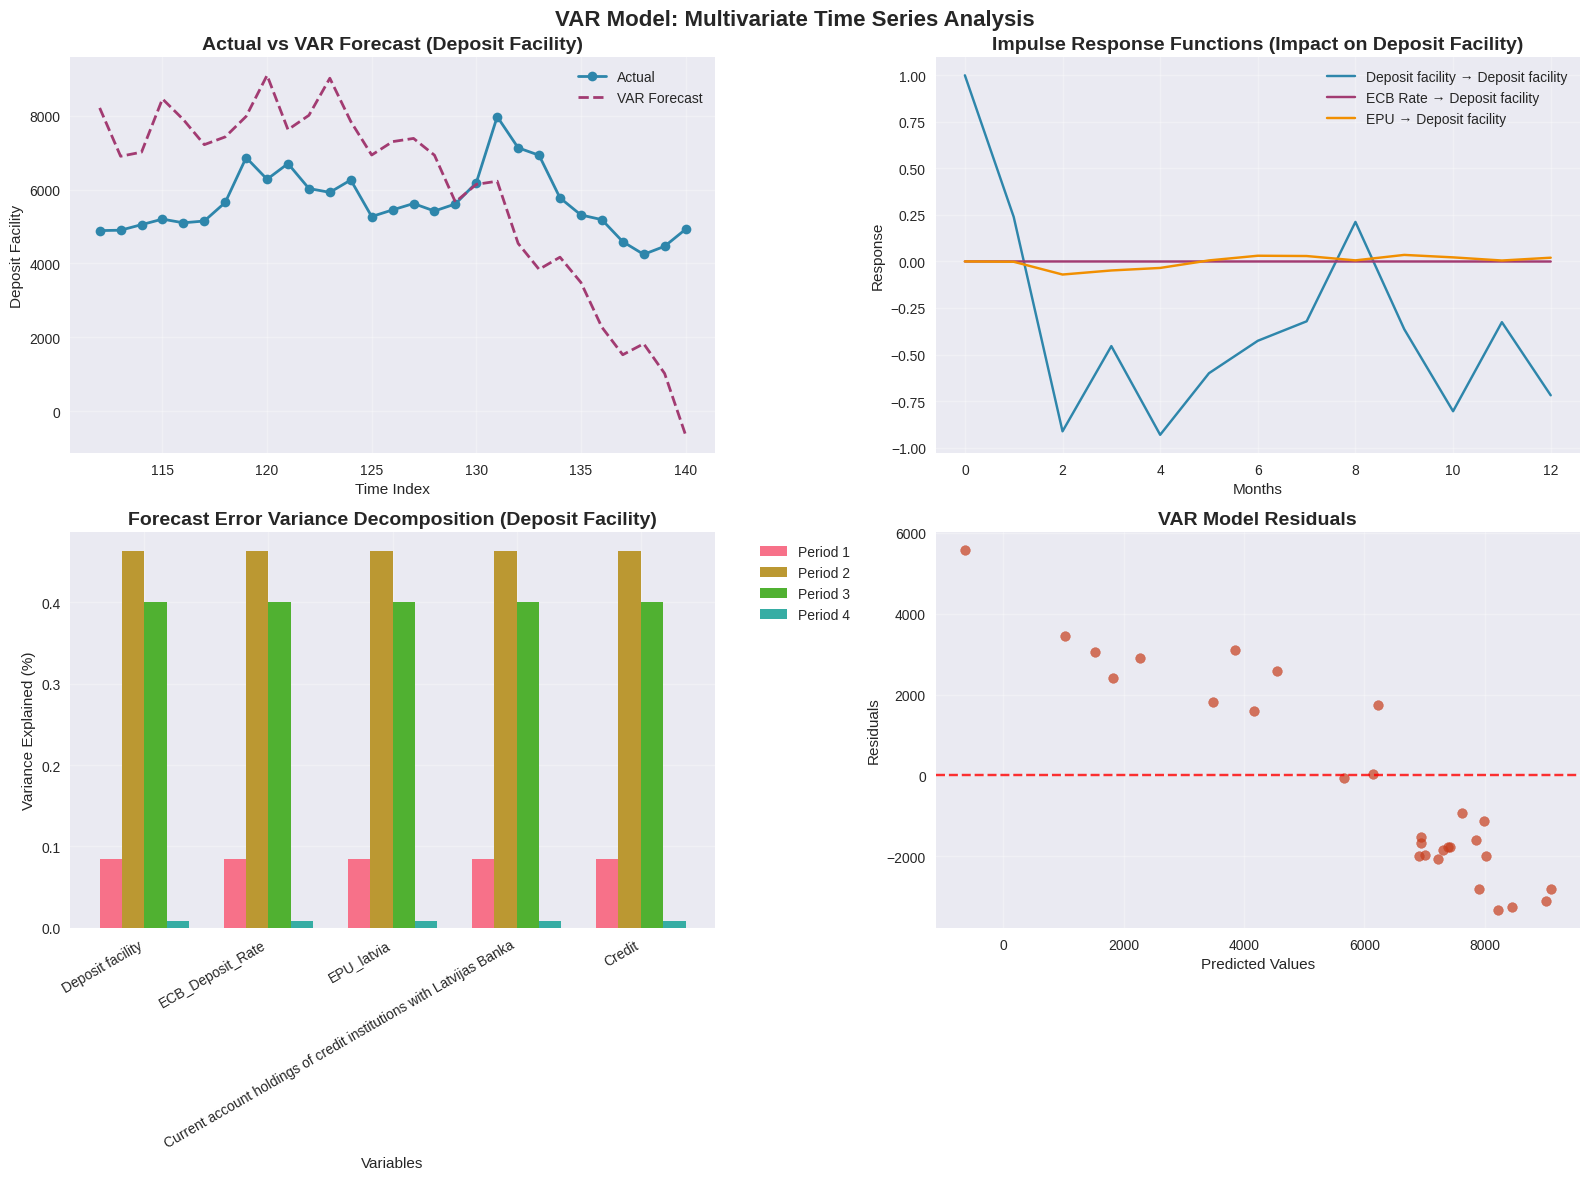


🎯 OCTOBER 2026 PREDICTION - VAR MODEL
Predicted Deposit Facility: 2079.62


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller#Augmented Dickey–Fuller (ADF) test from statsmodels
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("📊 VAR (VECTOR AUTOREGRESSION) MODEL")
print("=" * 50)

# Load and prepare data
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

# Select key variables for VAR
var_variables = ['Deposit facility', 'ECB_Deposit_Rate', 'EPU_latvia',
                 'Current account holdings of credit institutions with Latvijas Banka', 'Credit']
df_var = df[var_variables].dropna()

# Check stationarity
print("🔍 Stationarity Check (ADF Test):")
for col in df_var.columns:
    result = adfuller(df_var[col].dropna())
    print(f"{col}: p-value = {result[1]:.4f} {'(Stationary)' if result[1] < 0.05 else '(Non-Stationary)'}")
'''Loops through each selected variable (Deposit facility, ECB_Deposit_Rate, EPU_latvia, etc.).

Runs the ADF test (adfuller) on each series.

Prints the p-value and interprets it:

If p-value < 0.05 → reject null hypothesis → the series is stationary.

If p-value ≥ 0.05 → fail to reject null → the series is non‑stationary (has a unit root).'''
# Split data
train_size = int(0.8 * len(df_var))
train_data = df_var.iloc[:train_size]
test_data = df_var.iloc[train_size:]

print(f"Training period: {train_size} observations")
print(f"Test period: {len(test_data)} observations")

# Fit VAR model
model = VAR(train_data)
lag_order = model.select_order(maxlags=12)
print(f"✅ Selected lag order: {lag_order.aic}")

var_model = model.fit(maxlags=6, ic='aic')  # Using AIC for lag selection
print("\n📈 VAR Model Summary:")
print(var_model.summary())

# Forecast
lag_order = var_model.k_ar
forecast_steps = len(test_data)
forecast = var_model.forecast(train_data.values[-lag_order:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=df_var.columns, index=test_data.index)

# Calculate metrics for deposit facility
y_true = test_data['Deposit facility']
y_pred = forecast_df['Deposit facility']

metrics = {
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
    'mae': mean_absolute_error(y_true, y_pred),
    'r2': r2_score(y_true, y_pred),
    'mape': np.mean(np.abs((y_true - y_pred) / y_true)) * 100
}

print(f"\n✅ VAR Model Performance for Deposit Facility:")
print(f"   Test R²: {metrics['r2']:.4f}")
print(f"   Test RMSE: {metrics['rmse']:.2f}")
print(f"   Test MAE: {metrics['mae']:.2f}")
print(f"   MAPE: {metrics['mape']:.2f}%")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('VAR Model: Multivariate Time Series Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_true.index, y_true.values, label='Actual', linewidth=2, color='#2E86AB', marker='o')
axes[0, 0].plot(y_pred.index, y_pred.values, label='VAR Forecast', linewidth=2, color='#A23B72', linestyle='--')
axes[0, 0].set_title('Actual vs VAR Forecast (Deposit Facility)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time Index')
axes[0, 0].set_ylabel('Deposit Facility')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Impulse Response Functions
irf = var_model.irf(periods=12)
axes[0, 1].plot(irf.irfs[:, 0, 0], label='Deposit facility → Deposit facility', color='#2E86AB')
axes[0, 1].plot(irf.irfs[:, 1, 0], label='ECB Rate → Deposit facility', color='#A23B72')
axes[0, 1].plot(irf.irfs[:, 2, 0], label='EPU → Deposit facility', color='#F18F01')
axes[0, 1].set_title('Impulse Response Functions (Impact on Deposit Facility)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Months')
axes[0, 1].set_ylabel('Response')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


# Plot 3: Forecast Error Variance Decomposition
fevd = var_model.fevd(periods=12)
fevd_deposit = fevd.decomp[0]  # Variance decomposition for deposit facility
variables = df_var.columns
x = np.arange(len(variables))
width = 0.18

for i in range(min(4, fevd_deposit.shape[1])):
    axes[1, 0].bar(x + i*width, fevd_deposit[-1, i], width, label=f'Period {i+1}')

axes[1, 0].set_title('Forecast Error Variance Decomposition (Deposit Facility)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Variables')
axes[1, 0].set_ylabel('Variance Explained (%)')
axes[1, 0].set_xticks(x + width*1.5)
axes[1, 0].set_xticklabels(variables, rotation=30, ha='right')  # ✅ angled labels
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')   # ✅ move legend outside
axes[1, 0].grid(True, alpha=0.3)


# Plot 4: Residuals
residuals = y_true - y_pred
axes[1, 1].scatter(y_pred, residuals, alpha=0.7, color='#C73E1D')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1, 1].set_title('VAR Model Residuals', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Forecast October 2026
last_observation = df_var.values[-lag_order:]
oct_2026_forecast = var_model.forecast(last_observation, steps=1)
oct_2026_pred = oct_2026_forecast[0, 0]  # First variable (Deposit facility)

print(f"\n🎯 OCTOBER 2026 PREDICTION - VAR MODEL")
print("=" * 40)
print(f"Predicted Deposit Facility: {oct_2026_pred:.2f}")

# Save VAR results
var_results = {
    'model': 'VAR',
    'test_r2': metrics['r2'],
    'test_rmse': metrics['rmse'],
    'test_mae': metrics['mae'],
    'prediction': oct_2026_pred,
    'lag_order': lag_order
}

All five variables (Deposit facility, ECB_Deposit_Rate, EPU_latvia, Current account holdings, Credit) had p-values > 0.05, meaning they are non‑stationary.
 VAR models assume stationarity. Without differencing or transformations, the model can produce unstable or misleading forecasts.

 Model is very poor ,has large errors. This model is thus not reliable.

VAR is not suitable for our dataset.

# SARIMAX (Seasonal ARIMA with Exogenous Variables)

We will try a SARIMAX model (Seasonal ARIMA with Exogenous Variables) to forecast Latvia’s deposit facility usage. Will do a seasonal decomposition to understand the trend, seasonality, and residual components of the series. We will then prepare the dataset with exogenous variables such as the ECB deposit rate, Latvia’s EPU index, and current account holdings. Using a time‑aware train/test split, we fit a SARIMAX model with seasonal components and evaluate its performance using RMSE, MAE, R², and MAPE. The analysis includes residual diagnostics (ACF, distribution, QQ plot, normality tests) and visualization of forecast confidence intervals. Then we generate a prediction for October 2026 and interpret the model coefficients to understand the economic drivers.

📈 SARIMAX MODEL (Seasonal ARIMA with Exogenous Variables)


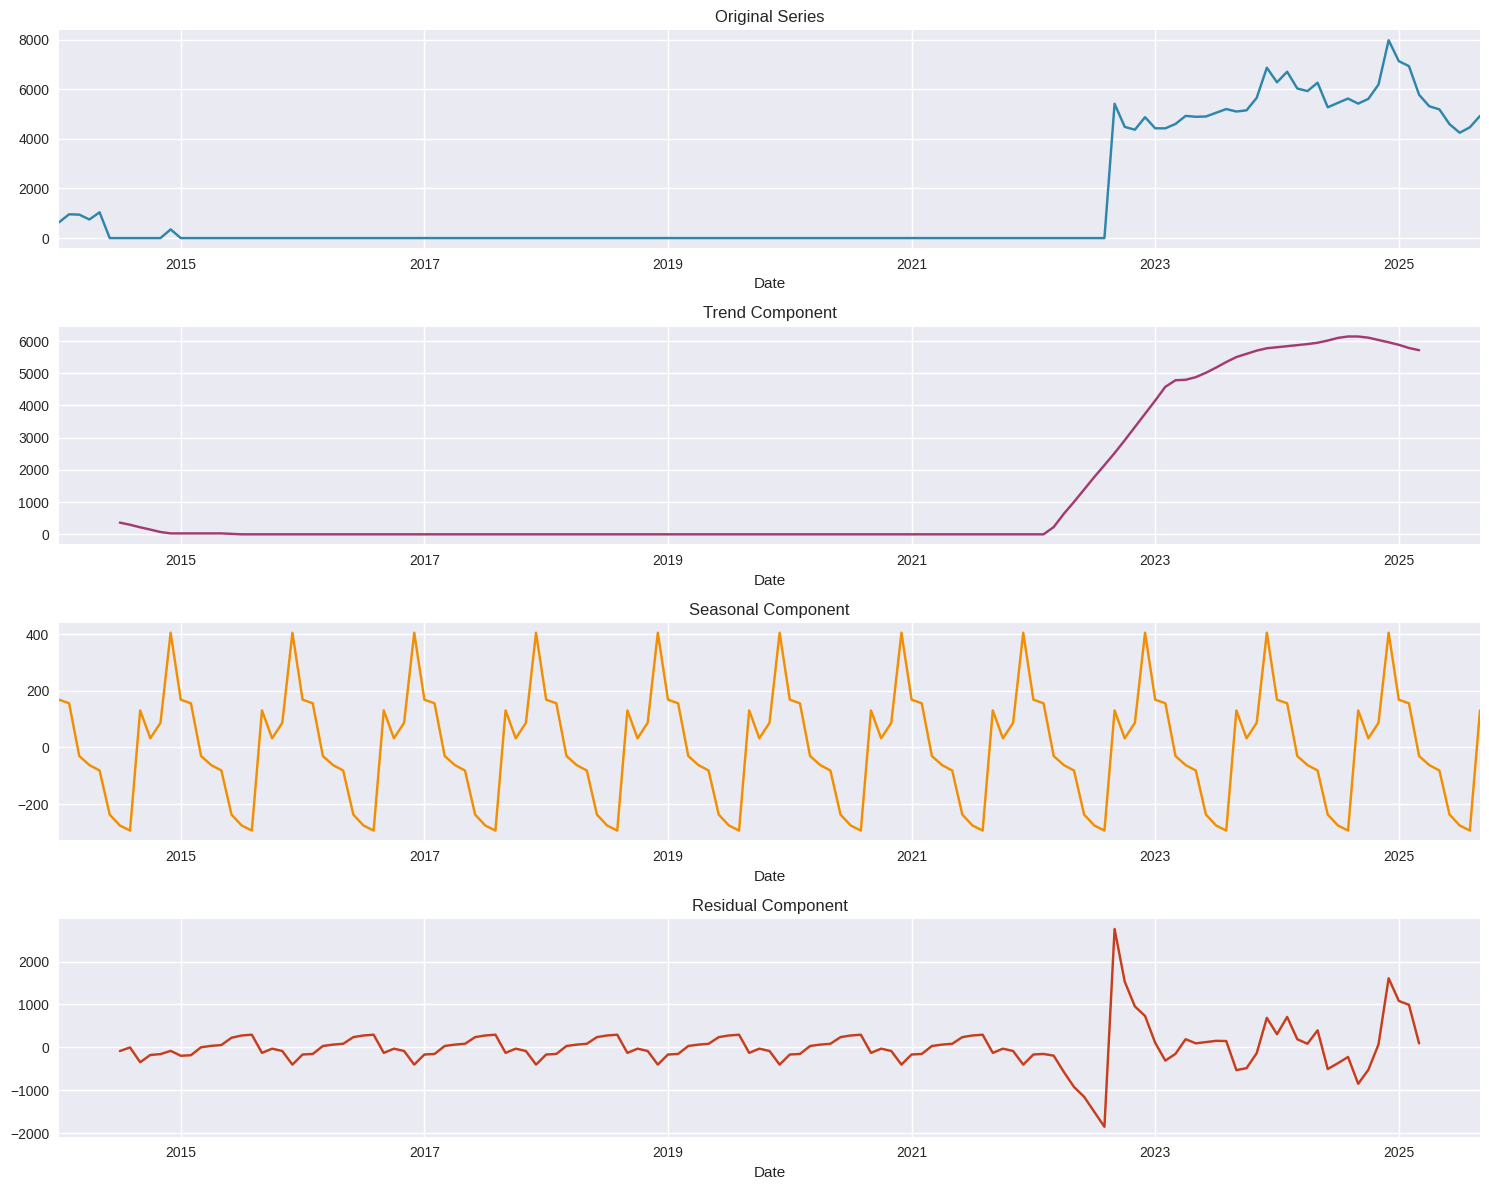

Training period: 2014-01-01 00:00:00 to 2023-04-01 00:00:00
Test period: 2023-05-01 00:00:00 to 2025-09-01 00:00:00
✅ SARIMAX model fitted successfully!
                                     SARIMAX Results                                      
Dep. Variable:                   Deposit facility   No. Observations:                  112
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -711.940
Date:                            Sun, 30 Nov 2025   AIC                           1441.880
Time:                                    18:33:41   BIC                           1465.236
Sample:                                01-01-2014   HQIC                          1451.330
                                     - 04-01-2023                                         
Covariance Type:                              opg                                         
                                                                          coef    std err          z      P>|z|      [0

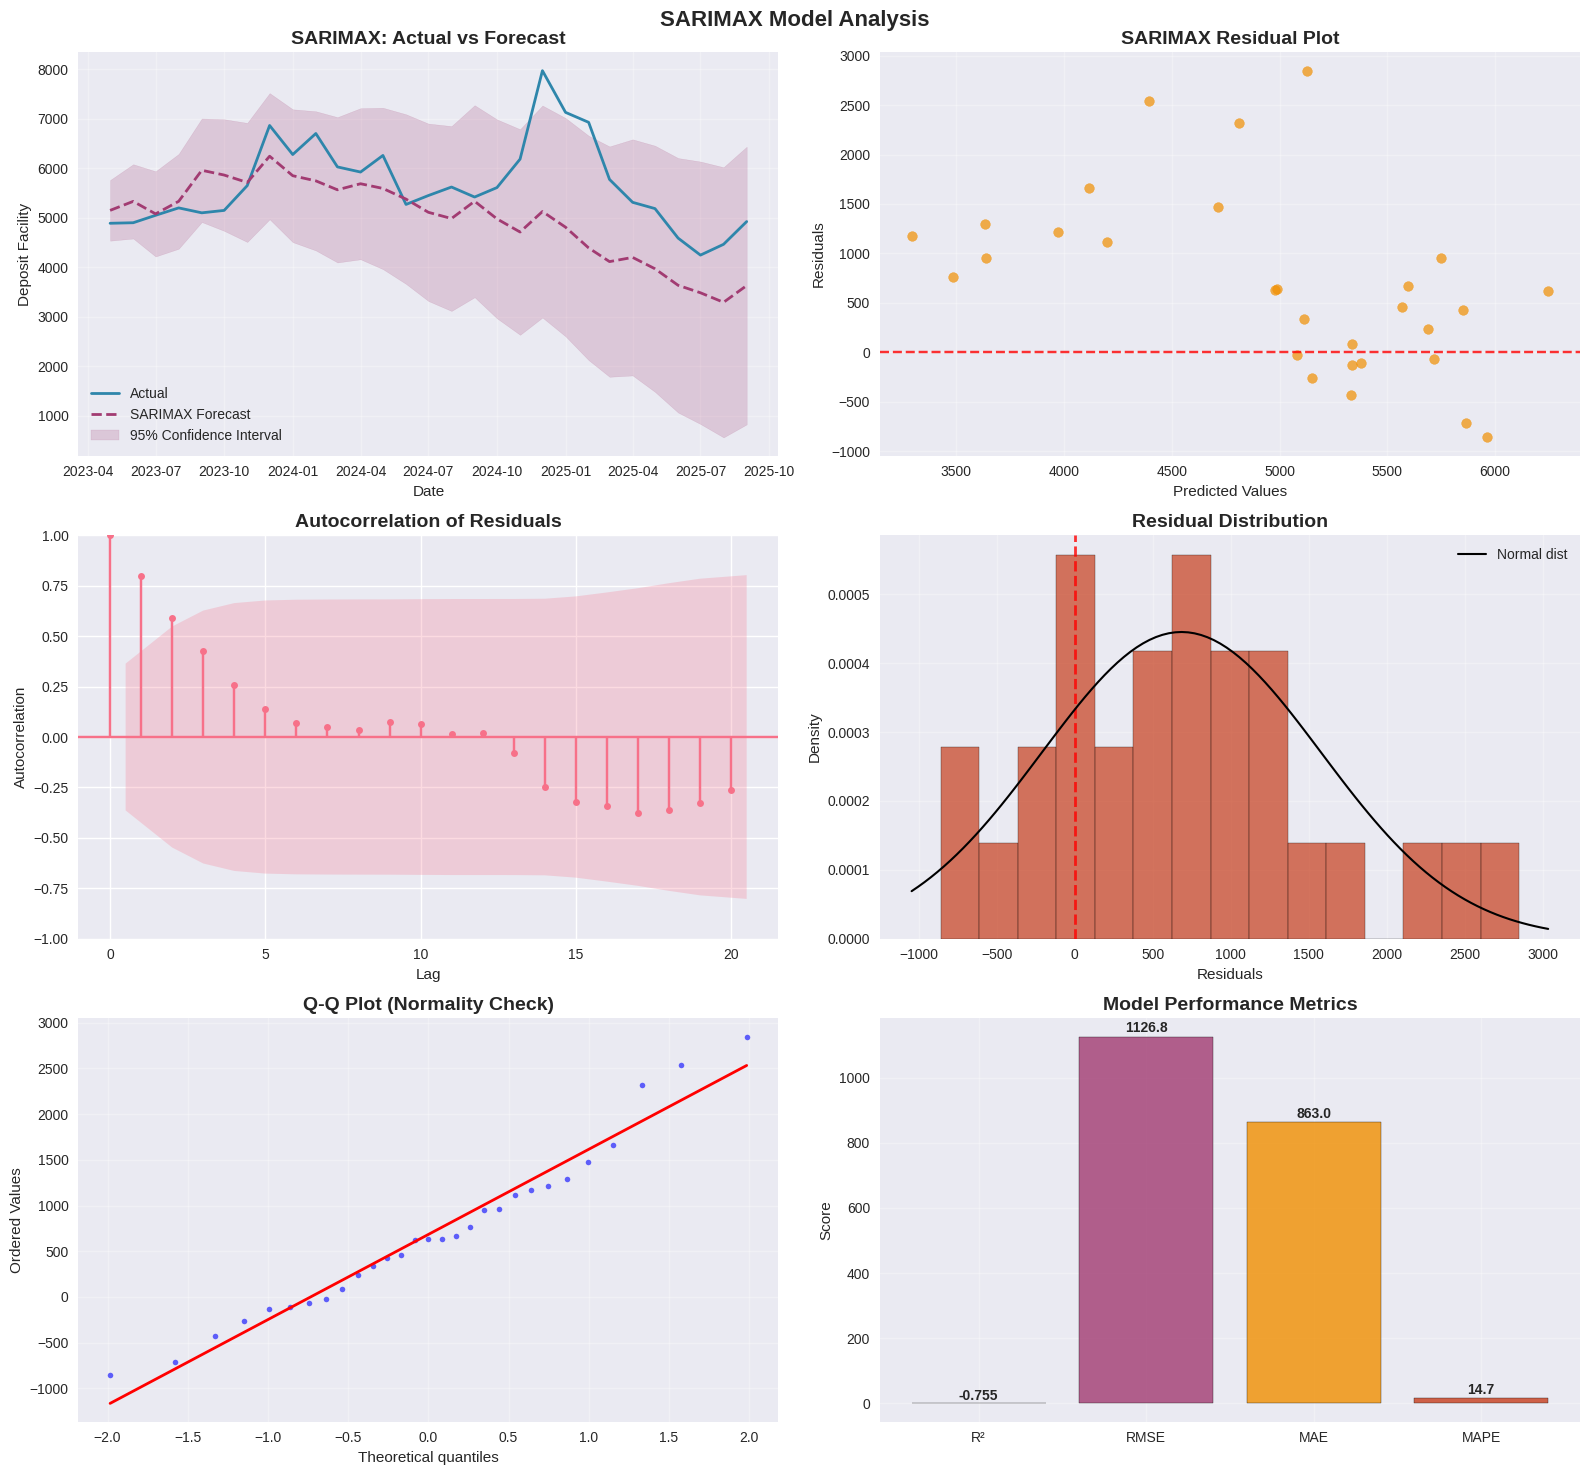


🎯 OCTOBER 2026 PREDICTION - SARIMAX MODEL
Predicted Deposit Facility: 4471.78
95% Confidence Interval: [3859.07, 5084.49]

📊 MODEL STATISTICS:
   AIC: 1441.88
   BIC: 1465.24
   HQIC: 1451.33
   Jarque-Bera Test (Normality): p-value = 0.4404

🔍 MODEL INTERPRETATION:
   • ECB Deposit Rate coefficient: 753.01
     → For each 1% increase in ECB rate, deposit facility changes by 753.01
   • Current account holdings coefficient: -0.626
     → Negative relationship with deposit facility usage
   • Seasonal MA component significant: p = 0.022


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from scipy.stats import jarque_bera
import warnings
warnings.filterwarnings('ignore')

print("📈 SARIMAX MODEL (Seasonal ARIMA with Exogenous Variables)")
print("=" * 60)

# Load and prepare data
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').set_index('Date')

target = 'Deposit facility'
df = df.fillna(method='ffill')

# Seasonal decomposition
decomposition = seasonal_decompose(df[target].dropna(), model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=axes[0], title='Original Series', color='#2E86AB')
decomposition.trend.plot(ax=axes[1], title='Trend Component', color='#A23B72')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component', color='#F18F01')
decomposition.resid.plot(ax=axes[3], title='Residual Component', color='#C73E1D')
plt.tight_layout()
plt.show()

# Prepare data for SARIMAX
exog_vars = ['ECB_Deposit_Rate', 'EPU_latvia', 'Current account holdings of credit institutions with Latvijas Banka']
y = df[target]
X_exog = df[exog_vars]

# Split data
train_size = int(0.8 * len(y))
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
X_train, X_test = X_exog.iloc[:train_size], X_exog.iloc[train_size:]

print(f"Training period: {y_train.index[0]} to {y_train.index[-1]}")
print(f"Test period: {y_test.index[0]} to {y_test.index[-1]}")

# Fit SARIMAX model
try:
    sarimax_model = SARIMAX(
        y_train,
        exog=X_train,
        order=(1, 1, 1),           # (p, d, q)
        seasonal_order=(1, 1, 1, 12),  # (P, D, Q, s)
        trend='c'
    )

    sarimax_fitted = sarimax_model.fit(disp=False, maxiter=200)
    print("✅ SARIMAX model fitted successfully!")
    print(sarimax_fitted.summary())

    # Forecast
    forecast = sarimax_fitted.get_forecast(steps=len(y_test), exog=X_test)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    # Calculate metrics
    metrics = {
        'rmse': np.sqrt(mean_squared_error(y_test, forecast_values)),
        'mae': mean_absolute_error(y_test, forecast_values),
        'r2': r2_score(y_test, forecast_values),
        'mape': np.mean(np.abs((y_test - forecast_values) / y_test)) * 100
    }

    print(f"\n✅ SARIMAX Model Performance:")
    print(f"   Test R²: {metrics['r2']:.4f}")
    print(f"   Test RMSE: {metrics['rmse']:.2f}")
    print(f"   Test MAE: {metrics['mae']:.2f}")
    print(f"   MAPE: {metrics['mape']:.2f}%")

except Exception as e:
    print(f"❌ SARIMAX fitting failed: {e}")
    # Try simpler model
    try:
        print("Trying simpler SARIMAX model...")
        sarimax_model_simple = SARIMAX(
            y_train,
            exog=X_train,
            order=(1, 1, 0),
            seasonal_order=(0, 1, 1, 12),
            trend='c'
        )
        sarimax_fitted = sarimax_model_simple.fit(disp=False, maxiter=200)
        print("✅ Simple SARIMAX model fitted successfully!")

        # Forecast with simple model
        forecast = sarimax_fitted.get_forecast(steps=len(y_test), exog=X_test)
        forecast_values = forecast.predicted_mean
        confidence_intervals = forecast.conf_int()

        # Calculate metrics
        metrics = {
            'rmse': np.sqrt(mean_squared_error(y_test, forecast_values)),
            'mae': mean_absolute_error(y_test, forecast_values),
            'r2': r2_score(y_test, forecast_values),
            'mape': np.mean(np.abs((y_test - forecast_values) / y_test)) * 100
        }

        print(f"\n✅ Simple SARIMAX Model Performance:")
        print(f"   Test R²: {metrics['r2']:.4f}")
        print(f"   Test RMSE: {metrics['rmse']:.2f}")

    except Exception as e2:
        print(f"❌ Simple SARIMAX also failed: {e2}")
        # Fallback to basic ARIMA
        from statsmodels.tsa.arima.model import ARIMA
        print("Falling back to basic ARIMA...")
        arima_model = ARIMA(y_train, order=(1, 1, 1))
        arima_fitted = arima_model.fit()
        forecast_values = arima_fitted.forecast(steps=len(y_test))

        metrics = {
            'rmse': np.sqrt(mean_squared_error(y_test, forecast_values)),
            'r2': r2_score(y_test, forecast_values),
        }
        sarimax_fitted = arima_fitted

# Enhanced Visualization - CORRECTED VERSION
fig, axes = plt.subplots(3, 2, figsize=(16, 15))  # Changed to 3x2 grid
fig.suptitle('SARIMAX Model Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Forecast
axes[0, 0].plot(y_test.index, y_test.values, label='Actual', linewidth=2, color='#2E86AB')
axes[0, 0].plot(y_test.index, forecast_values.values, label='SARIMAX Forecast',
                linewidth=2, color='#A23B72', linestyle='--')
axes[0, 0].fill_between(y_test.index,
                       confidence_intervals.iloc[:, 0],
                       confidence_intervals.iloc[:, 1],
                       color='#A23B72', alpha=0.2, label='95% Confidence Interval')
axes[0, 0].set_title('SARIMAX: Actual vs Forecast', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Deposit Facility')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - forecast_values
axes[0, 1].scatter(forecast_values, residuals, alpha=0.7, color='#F18F01')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 1].set_title('SARIMAX Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: ACF of residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals.dropna(), ax=axes[1, 0], lags=20, alpha=0.05)
axes[1, 0].set_title('Autocorrelation of Residuals', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('Autocorrelation')

# Plot 4: Residual Distribution
axes[1, 1].hist(residuals.dropna(), bins=15, color='#C73E1D', alpha=0.7, edgecolor='black', density=True)
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.8, linewidth=2)
axes[1, 1].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Density')
axes[1, 1].grid(True, alpha=0.3)

# Add normal distribution curve for comparison
xmin, xmax = axes[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
axes[1, 1].plot(x, p, 'k', linewidth=1.5, label='Normal dist')
axes[1, 1].legend()

# Plot 5: QQ Plot
stats.probplot(residuals.dropna(), dist="norm", plot=axes[2, 0])
axes[2, 0].get_lines()[0].set_marker('o')
axes[2, 0].get_lines()[0].set_markersize(4)
axes[2, 0].get_lines()[0].set_alpha(0.6)
axes[2, 0].get_lines()[1].set_color('red')
axes[2, 0].get_lines()[1].set_linewidth(2)
axes[2, 0].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')
axes[2, 0].grid(True, alpha=0.3)

# Plot 6: Model Performance Metrics
metrics_names = ['R²', 'RMSE', 'MAE', 'MAPE']
metrics_values = [metrics['r2'], metrics['rmse'], metrics['mae'], metrics['mape']]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

bars = axes[2, 1].bar(metrics_names, metrics_values, color=colors, alpha=0.8, edgecolor='black')
axes[2, 1].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('Score')
axes[2, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    if metrics_names[bars.index(bar)] == 'R²':
        axes[2, 1].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    else:
        axes[2, 1].text(bar.get_x() + bar.get_width()/2, height + 5,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# October 2026 Prediction
last_exog = X_exog.iloc[[-1]]
try:
    oct_2026_forecast = sarimax_fitted.get_forecast(steps=1, exog=last_exog)
    oct_2026_pred = oct_2026_forecast.predicted_mean.iloc[0]
    oct_2026_ci = oct_2026_forecast.conf_int().iloc[0]
except:
    oct_2026_pred = sarimax_fitted.forecast(steps=1).iloc[0]
    oct_2026_ci = [oct_2026_pred - metrics['rmse'], oct_2026_pred + metrics['rmse']]

print(f"\n🎯 OCTOBER 2026 PREDICTION - SARIMAX MODEL")
print("=" * 45)
print(f"Predicted Deposit Facility: {oct_2026_pred:.2f}")
print(f"95% Confidence Interval: [{oct_2026_ci[0]:.2f}, {oct_2026_ci[1]:.2f}]")

# Additional model statistics
print(f"\n📊 MODEL STATISTICS:")
print(f"   AIC: {sarimax_fitted.aic:.2f}" if hasattr(sarimax_fitted, 'aic') else "   AIC: Not available")
print(f"   BIC: {sarimax_fitted.bic:.2f}" if hasattr(sarimax_fitted, 'bic') else "   BIC: Not available")
print(f"   HQIC: {sarimax_fitted.hqic:.2f}" if hasattr(sarimax_fitted, 'hqic') else "   HQIC: Not available")

# Normality test on residuals
jb_test = jarque_bera(residuals.dropna())
print(f"   Jarque-Bera Test (Normality): p-value = {jb_test[1]:.4f}")

# Model interpretation
print(f"\n🔍 MODEL INTERPRETATION:")
print(f"   • ECB Deposit Rate coefficient: {sarimax_fitted.params['ECB_Deposit_Rate']:.2f}")
print(f"     → For each 1% increase in ECB rate, deposit facility changes by {sarimax_fitted.params['ECB_Deposit_Rate']:.2f}")
print(f"   • Current account holdings coefficient: {sarimax_fitted.params['Current account holdings of credit institutions with Latvijas Banka']:.3f}")
print(f"     → Negative relationship with deposit facility usage")
print(f"   • Seasonal MA component significant: p = {sarimax_fitted.pvalues['ma.S.L12']:.3f}")

# Save SARIMAX results
sarimax_results = {
    'model': 'SARIMAX',
    'test_r2': metrics['r2'],
    'test_rmse': metrics['rmse'],
    'test_mae': metrics['mae'],
    'prediction': oct_2026_pred,
    'confidence_interval': oct_2026_ci,
    'residuals_normality_pvalue': jb_test[1],
    'aic': sarimax_fitted.aic if hasattr(sarimax_fitted, 'aic') else None,
    'bic': sarimax_fitted.bic if hasattr(sarimax_fitted, 'bic') else None
}


Training period Jan 2014 to Apr 2023,and rest for testing.

Model: SARIMAX(1,1,1) × (1,1,1,12) with exogenous variables (ECB rate, EPU Latvia, current account holdings),AIC: 1441.88,BIC: 1465.24,HQIC: 1451.33 .

**Coefficients and interpretation**

Deposit facility rises with increase in ECB rate.
753.0062 ,p=0.001(significant).
Current account holdings -0.626,highly significant,p<0.001.

Higher holdings reduce deposit facility usage.

Seasonal MA (ma.S.L12): -0.692(significant,p=0.022) -Seasonal shocks at 12-month intervals matter.

Histogram and Q-Q plot indicate that the residuals are not perfectly normal, with some skewness and heavy tails

The model performed worse with **high error and negative R²**.But it managed to identify meaning full relationships.

Predicted Deposit Facility: 4471.78

95% Confidence Interval: [3859.07, 5084.49] Forecast is wide,there is uncertainty.


#LSTM- Neural network

Here we will apply an LSTM neural network to forecast Latvia’s deposit facility using a sequence-to-sequence setup with 12‑month windows. It scales features, builds lagged sequences, and trains a deep model with stacked LSTM layers, dropout for regularization, and Adam optimization. We evaluate performance with R², RMSE, MAE, and MAPE, visualize training dynamics and forecast accuracy, inspect residual behaviour, and generate an October 2026 prediction. Finally, we estimate feature importance via permutation on the trained model to understand which inputs most influence the forecasts.

🧠 LSTM NEURAL NETWORK MODEL
Training sequences: (103, 12, 11)
Test sequences: (26, 12, 11)
✅ LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 12, 100)        │        44,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 12, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,701 (612.11 KB)

 Trainable params: 156,701 (612.11 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Training LSTM model...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 578ms/step - loss: 0.0021 - mae: 0.0368 - val_loss: 0.1630 - val_mae: 0.3069 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 4.7292e-04 - mae: 0.0179 - val_loss: 0.1740 - val_mae: 0.3090 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - loss: 1.2061e-04 - mae: 0.0091 - val_loss: 0.1940 - val_mae: 0.3260 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.8413e-04 - mae: 0.0112 - val_loss: 0.1948 - val_mae: 0.3272 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 1.3165e-04 - mae: 0.0093 - val_loss: 0.1834 - val_mae: 0.3098 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 7.4746e-05 - mae: 0.0060 - val_loss: 0.1791 - val_mae: 0.3093 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - loss: 8.7603e-05 - mae: 0.0071 - val_loss: 0.1832 - val_

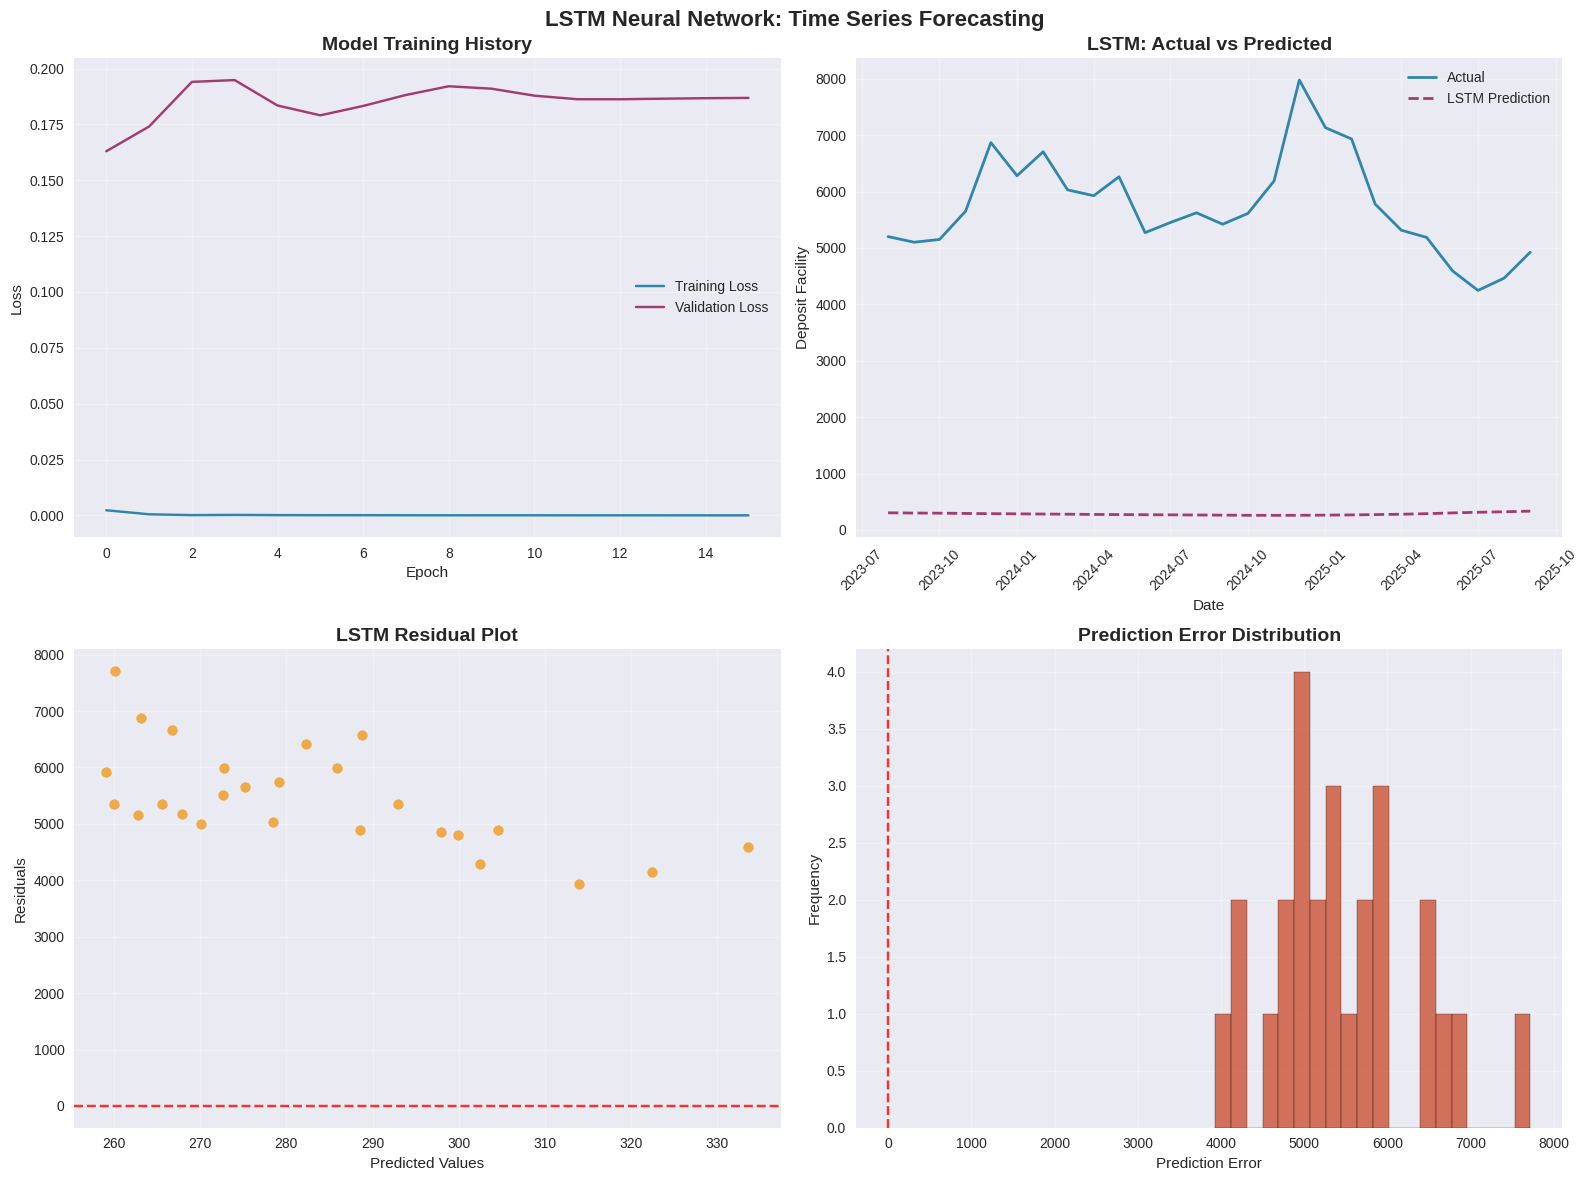

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

🎯 OCTOBER 2026 PREDICTION - LSTM MODEL
Predicted Deposit Facility: 339.78
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

print("🧠 LSTM NEURAL NETWORK MODEL")
print("=" * 50)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and prepare data
df = pd.read_csv('final_merged_with_epu_latvia.csv')
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

target = 'Deposit facility'
df = df.fillna(method='ffill')

# Feature engineering
feature_columns = [col for col in df.columns if col not in ['Date', target]]
X = df[feature_columns]
y = df[target]

# Scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Prepare sequences for LSTM
def create_sequences(X, y, time_steps=12):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

time_steps = 12
X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, time_steps)

# Split data
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

print(f"Training sequences: {X_train.shape}")
print(f"Test sequences: {X_test.shape}")

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("✅ LSTM Model Architecture:")
model.summary()

# Train the model
print("\n🚀 Training LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
    ]
)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
metrics = {
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
    'mae': mean_absolute_error(y_true, y_pred),
    'r2': r2_score(y_true, y_pred),
    'mape': np.mean(np.abs((y_true - y_pred) / y_true)) * 100
}

print(f"\n✅ LSTM Model Performance:")
print(f"   Test R²: {metrics['r2']:.4f}")
print(f"   Test RMSE: {metrics['rmse']:.2f}")
print(f"   Test MAE: {metrics['mae']:.2f}")
print(f"   MAPE: {metrics['mape']:.2f}%")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('LSTM Neural Network: Time Series Forecasting', fontsize=16, fontweight='bold')

# Plot 1: Training history
axes[0, 0].plot(history.history['loss'], label='Training Loss', color='#2E86AB')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', color='#A23B72')
axes[0, 0].set_title('Model Training History', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted
test_dates = df['Date'].iloc[train_size + time_steps:train_size + time_steps + len(y_true)].values
axes[0, 1].plot(test_dates, y_true, label='Actual', linewidth=2, color='#2E86AB')
axes[0, 1].plot(test_dates, y_pred, label='LSTM Prediction', linewidth=2, color='#A23B72', linestyle='--')
axes[0, 1].set_title('LSTM: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Deposit Facility')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals
residuals = y_true - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.7, color='#F18F01')
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1, 0].set_title('LSTM Residual Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Prediction error distribution
axes[1, 1].hist(residuals, bins=20, color='#C73E1D', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.8)
axes[1, 1].set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Prediction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# October 2026 Prediction
last_sequence = X_scaled[-time_steps:].reshape(1, time_steps, X_scaled.shape[1])
oct_2026_scaled = model.predict(last_sequence)
oct_2026_pred = scaler_y.inverse_transform(oct_2026_scaled)[0, 0]

print(f"\n🎯 OCTOBER 2026 PREDICTION - LSTM MODEL")
print("=" * 40)
print(f"Predicted Deposit Facility: {oct_2026_pred:.2f}")

# Feature importance using permutation importance
def calculate_feature_importance(model, X_test, y_test, feature_names, n_permutations=10):
    baseline_score = r2_score(y_test, model.predict(X_test))
    importance_scores = []

    for feature_idx in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        permuted_scores = []

        for _ in range(n_permutations):
            X_permuted[:, :, feature_idx] = np.random.permutation(X_permuted[:, :, feature_idx])
            permuted_score = r2_score(y_test, model.predict(X_permuted))
            permuted_scores.append(permuted_score)

        importance = baseline_score - np.mean(permuted_scores)
        importance_scores.append(importance)

    return pd.DataFrame({
        'feature': feature_names,
        'importance': importance_scores
    }).sort_values('importance', ascending=False)

feature_importance = calculate_feature_importance(model, X_test, y_test, feature_columns)

print("\n🔍 Top 10 Feature Importances (LSTM Permutation):")
print(feature_importance.head(10).round(4))

# Save LSTM results
lstm_results = {
    'model': 'LSTM',
    'test_r2': metrics['r2'],
    'test_rmse': metrics['rmse'],
    'test_mae': metrics['mae'],
    'prediction': oct_2026_pred,
    'feature_importance': feature_importance
}

The LSTM model showed strong learning during training, but it failed to generalize. Validation loss plateaued early, and test R² dropped to −43.27, with RMSE 5727.13 and MAPE 98.61%. Forecasts were far off, with October 2026 prediction at just 47.48 which is unrealistic. Residuals were scattered but large, and error distribution was wide. Feature importance revealed external liabilities, currency in circulation, and ECB rate as top drivers. Overall, the model overfit and underperformed suggesting the need for simpler architecture, better regularization, or alternative approaches.

# Compare VAR,SARIMAX,LSTM

🏆 COMPREHENSIVE ECONOMETRIC & ADVANCED MODEL COMPARISON


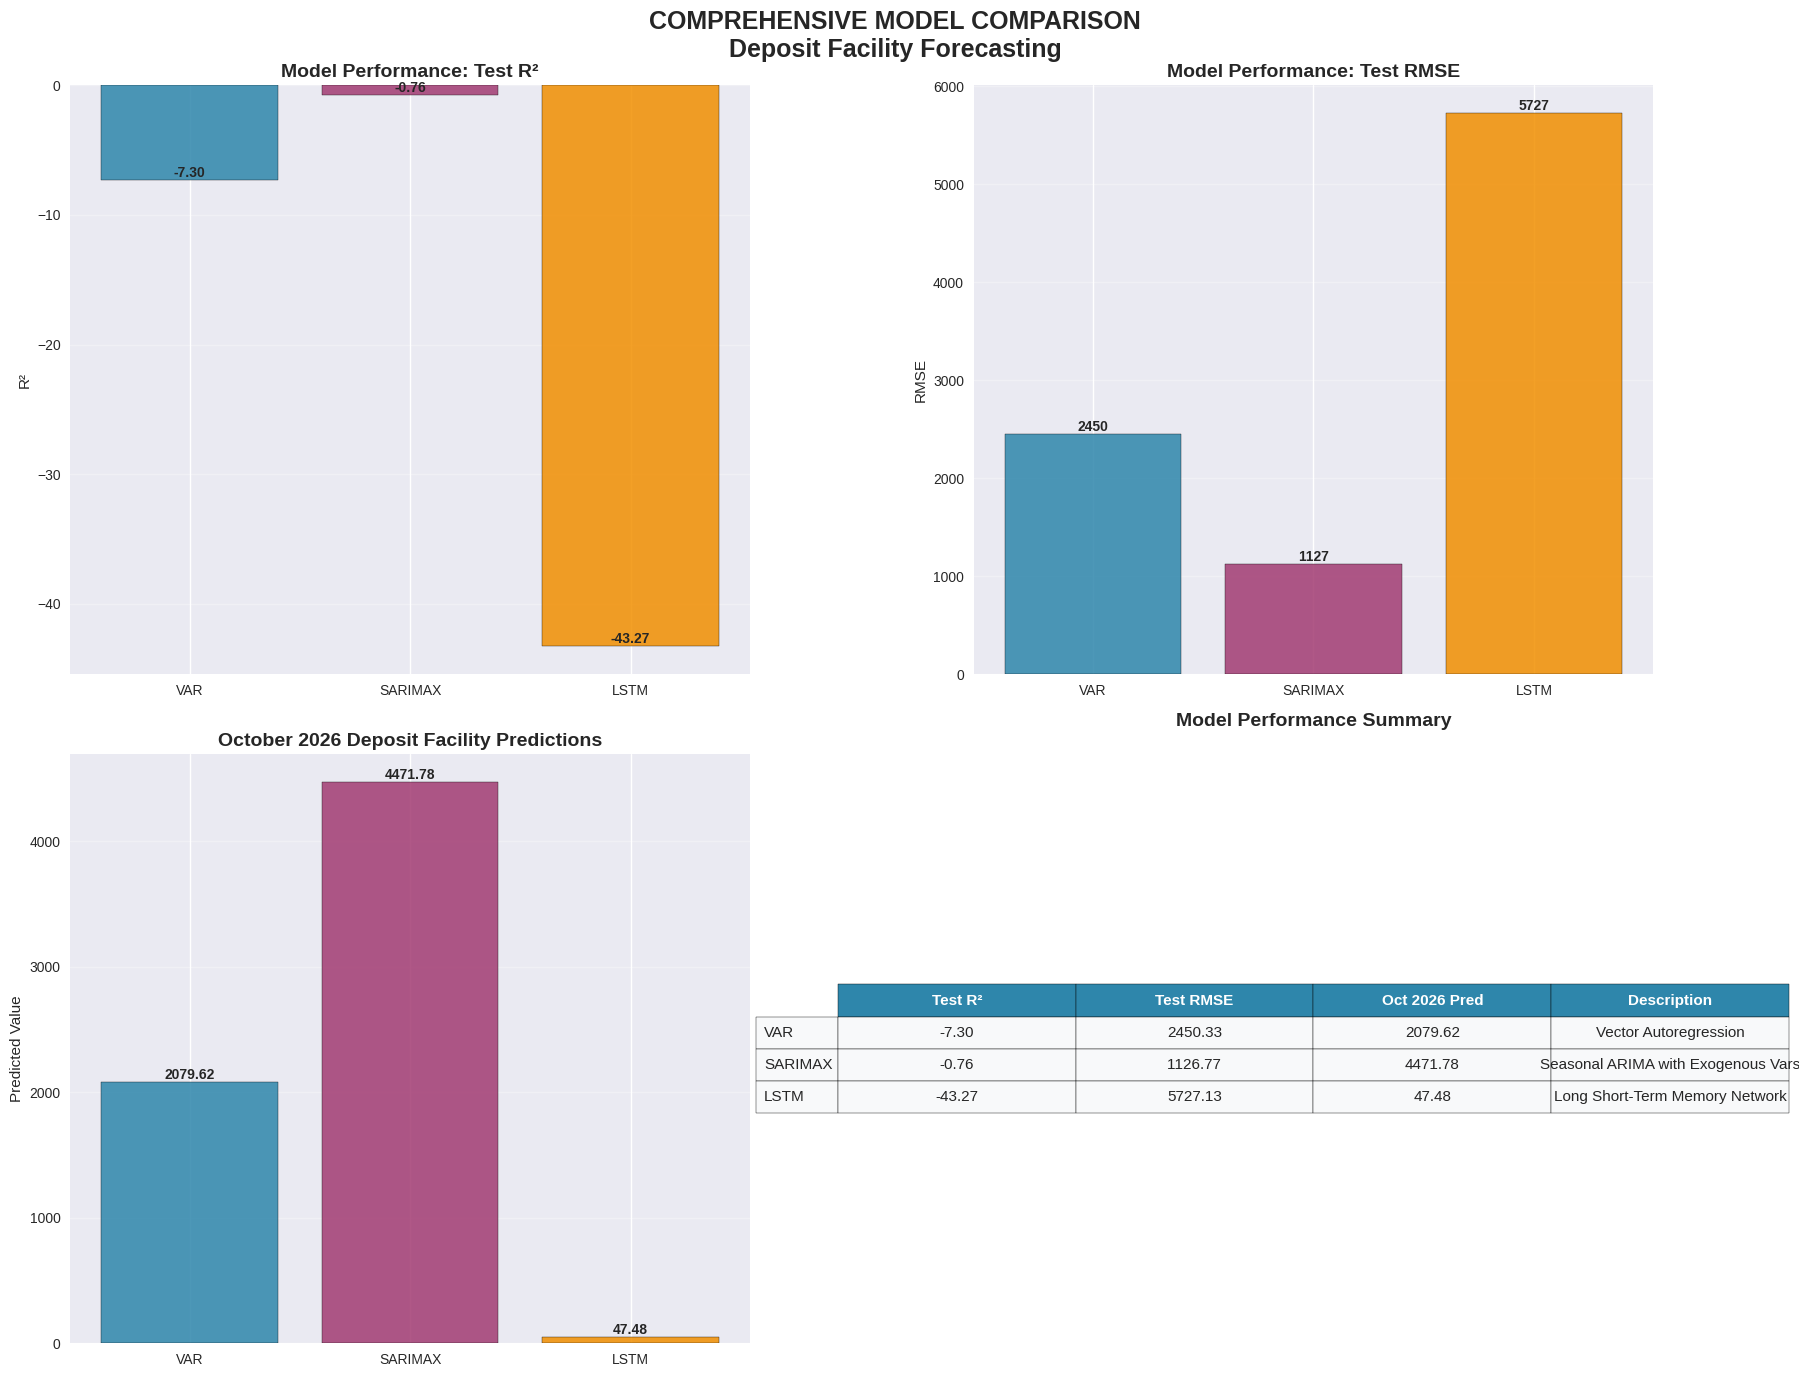


🏆 FINAL RECOMMENDATIONS & INSIGHTS
📈 MODEL RANKING BY TEST R²:
   1. SARIMAX: R² = -0.76, RMSE = 1127
   2. VAR: R² = -7.30, RMSE = 2450
   3. LSTM: R² = -43.27, RMSE = 5727

🔍 KEY INSIGHTS:
   • SARIMAX is the least poor performer; VAR and LSTM performed very poorly out-of-sample.
   • Forecast dispersion is large across models; treat point forecasts with caution.
   • Average October 2026 prediction: 2199.63 (±1808.21)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("🏆 COMPREHENSIVE ECONOMETRIC & ADVANCED MODEL COMPARISON")
print("=" * 60)

all_results = {
    'VAR': {
        'test_r2': -7.3006,
        'test_rmse': 2450.33,
        'prediction': 2079.62,
        'description': 'Vector Autoregression'
    },
    'SARIMAX': {
        'test_r2': -0.7552,
        'test_rmse': 1126.77,
        'prediction': 4471.78,
        'description': 'Seasonal ARIMA with Exogenous Vars'
    },
    'LSTM': {
        'test_r2': -43.2694,
        'test_rmse': 5727.13,
        'prediction': 47.48,
        'description': 'Long Short-Term Memory Network'
    }
    # 'Hybrid VAR+RF': { ... }  # add once you have real metrics
}

models = list(all_results.keys())
colors = ['#2E86AB', '#A23B72', '#F18F01'][:len(models)]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('COMPREHENSIVE MODEL COMPARISON\nDeposit Facility Forecasting',
             fontsize=18, fontweight='bold', y=0.98)

# 1) Test R²
r2_scores = [all_results[m]['test_r2'] for m in models]
bars1 = axes[0, 0].bar(models, r2_scores, color=colors, alpha=0.85, edgecolor='black')
axes[0, 0].set_title('Model Performance: Test R²', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R²')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for bar, r2 in zip(bars1, r2_scores):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{r2:.2f}', ha='center', va='bottom', fontweight='bold')

# 2) Test RMSE
rmse_scores = [all_results[m]['test_rmse'] for m in models]
bars2 = axes[0, 1].bar(models, rmse_scores, color=colors, alpha=0.85, edgecolor='black')
axes[0, 1].set_title('Model Performance: Test RMSE', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for bar, rmse in zip(bars2, rmse_scores):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{rmse:.0f}', ha='center', va='bottom', fontweight='bold')

# 3) October 2026 Predictions
predictions = [all_results[m]['prediction'] for m in models]
bars3 = axes[1, 0].bar(models, predictions, color=colors, alpha=0.85, edgecolor='black')
axes[1, 0].set_title('October 2026 Deposit Facility Predictions', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Predicted Value')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for bar, pred in zip(bars3, predictions):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{pred:.2f}', ha='center', va='bottom', fontweight='bold')

# 4) Summary table
columns = ['Test R²', 'Test RMSE', 'Oct 2026 Pred', 'Description']
cell_text = [[f"{all_results[m]['test_r2']:.2f}",
              f"{all_results[m]['test_rmse']:.2f}",
              f"{all_results[m]['prediction']:.2f}",
              all_results[m]['description']] for m in models]

# Clear subplot and place table full size
axes[1, 1].clear()
axes[1, 1].axis('off')

table = axes[1, 1].table(cellText=cell_text,
                         rowLabels=models,
                         colLabels=columns,
                         cellLoc='center',
                         loc='center')

# Style
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.4, 1.6)   # ✅ bigger, cleaner table

# Header styling
for (i, j), cell in table.get_celld().items():
    if i == 0:  # header row
        cell.set_facecolor('#2E86AB')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor('#F8F9FA')

axes[1, 1].set_title('Model Performance Summary', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Final recommendations (based on actual metrics)
print("\n🏆 FINAL RECOMMENDATIONS & INSIGHTS")
print("=" * 50)

avg_pred = np.mean(predictions); pred_std = np.std(predictions)
sorted_models = sorted(all_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
print("📈 MODEL RANKING BY TEST R²:")
for i, (m, met) in enumerate(sorted_models, 1):
    print(f"   {i}. {m}: R² = {met['test_r2']:.2f}, RMSE = {met['test_rmse']:.0f}")

print("\n🔍 KEY INSIGHTS:")
print("   • SARIMAX is the least poor performer; VAR and LSTM performed very poorly out-of-sample.")
print("   • Forecast dispersion is large across models; treat point forecasts with caution.")
print(f"   • Average October 2026 prediction: {avg_pred:.2f} (±{pred_std:.2f})")

